In [1]:
import sys
sys.path.insert(0, '../')
from NE204_Functions import *

Plots directory already exists


## Dead Detector ):

In [71]:
data_old, saturated = import_data('../Lab-1/Data/Combined_Data/Uncombined_Data/Co60-36in-1min_1.h5')
data_new, saturated = import_data('Data/Combined_Data/Pls-Be-Alive-6.h5')

Checking for Saturation:   0%|          | 0/10149 [00:00<?, ?it/s]

Checking for Saturation:   0%|          | 0/11719 [00:00<?, ?it/s]

In [72]:
energies_old, energies_inds = calibrate_pulses(data_old, return_inds=True)
energies_new = calibrate_pulses(data_new)

Creating spectra:   0%|          | 0/10149 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/11719 [00:00<?, ?it/s]

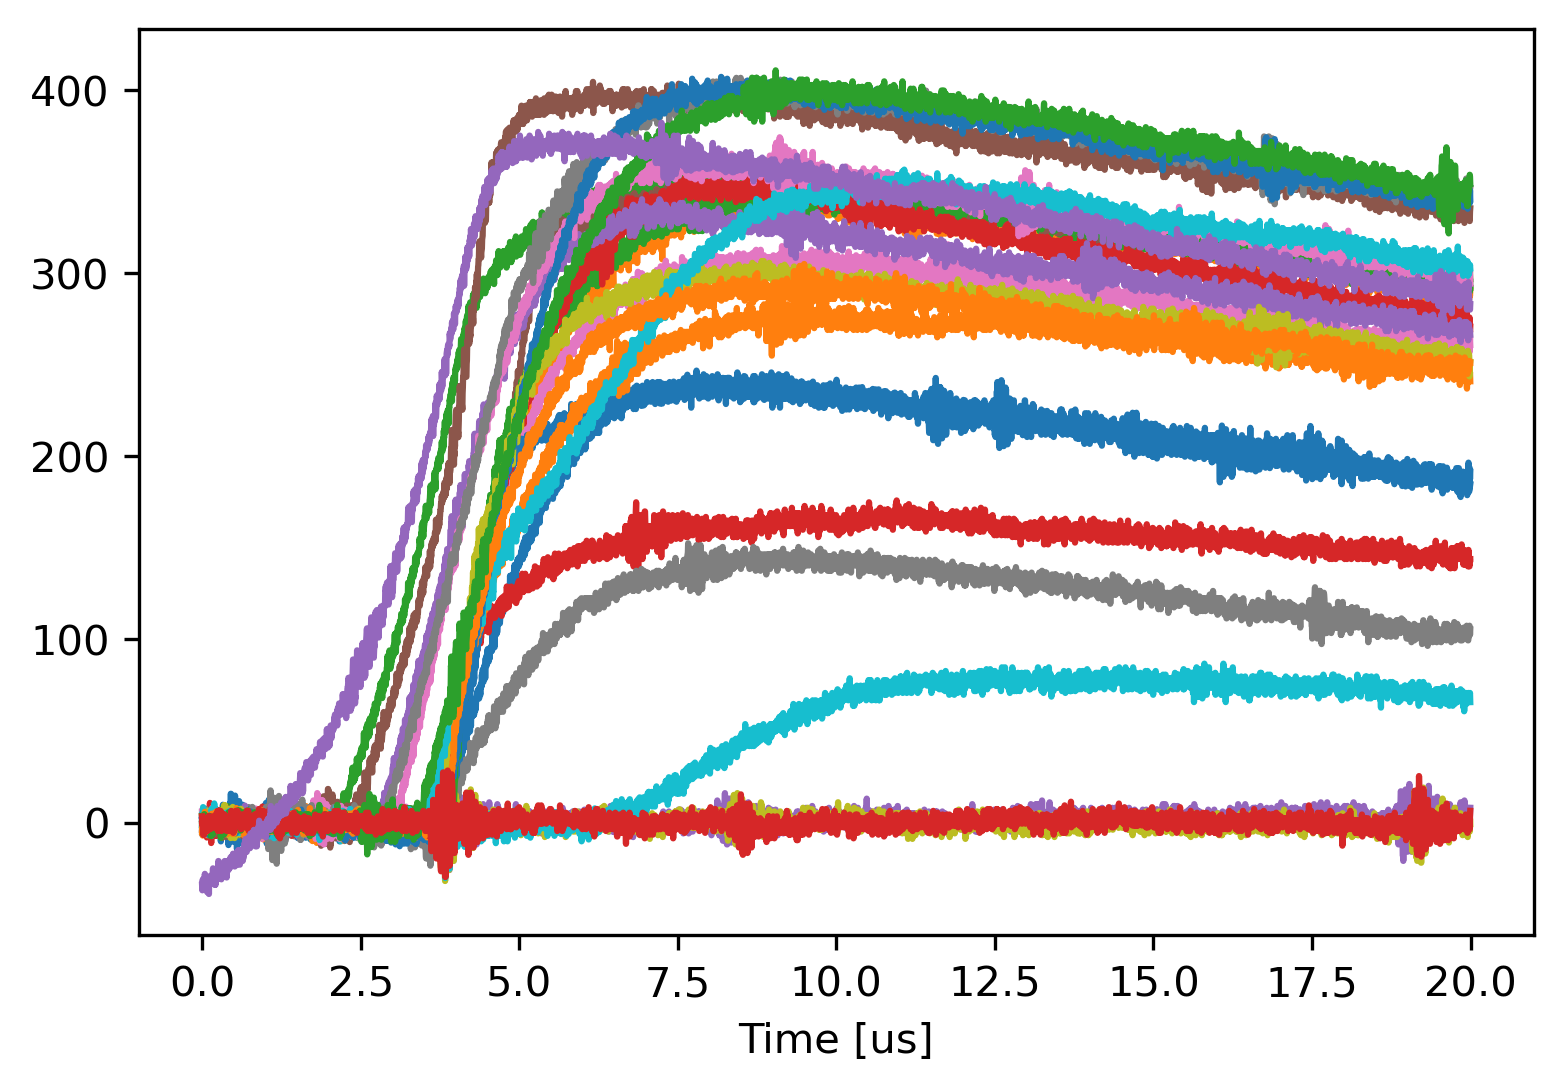

In [73]:
for i in range(25):
    if i not in saturated:
        plt.plot(4e-3*np.arange(5000), reset_zero(data_new[i][:5000])) #, alpha=0.5)
plt.xlabel('Time [us]')
plt.savefig('Plots/broken-pulses.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

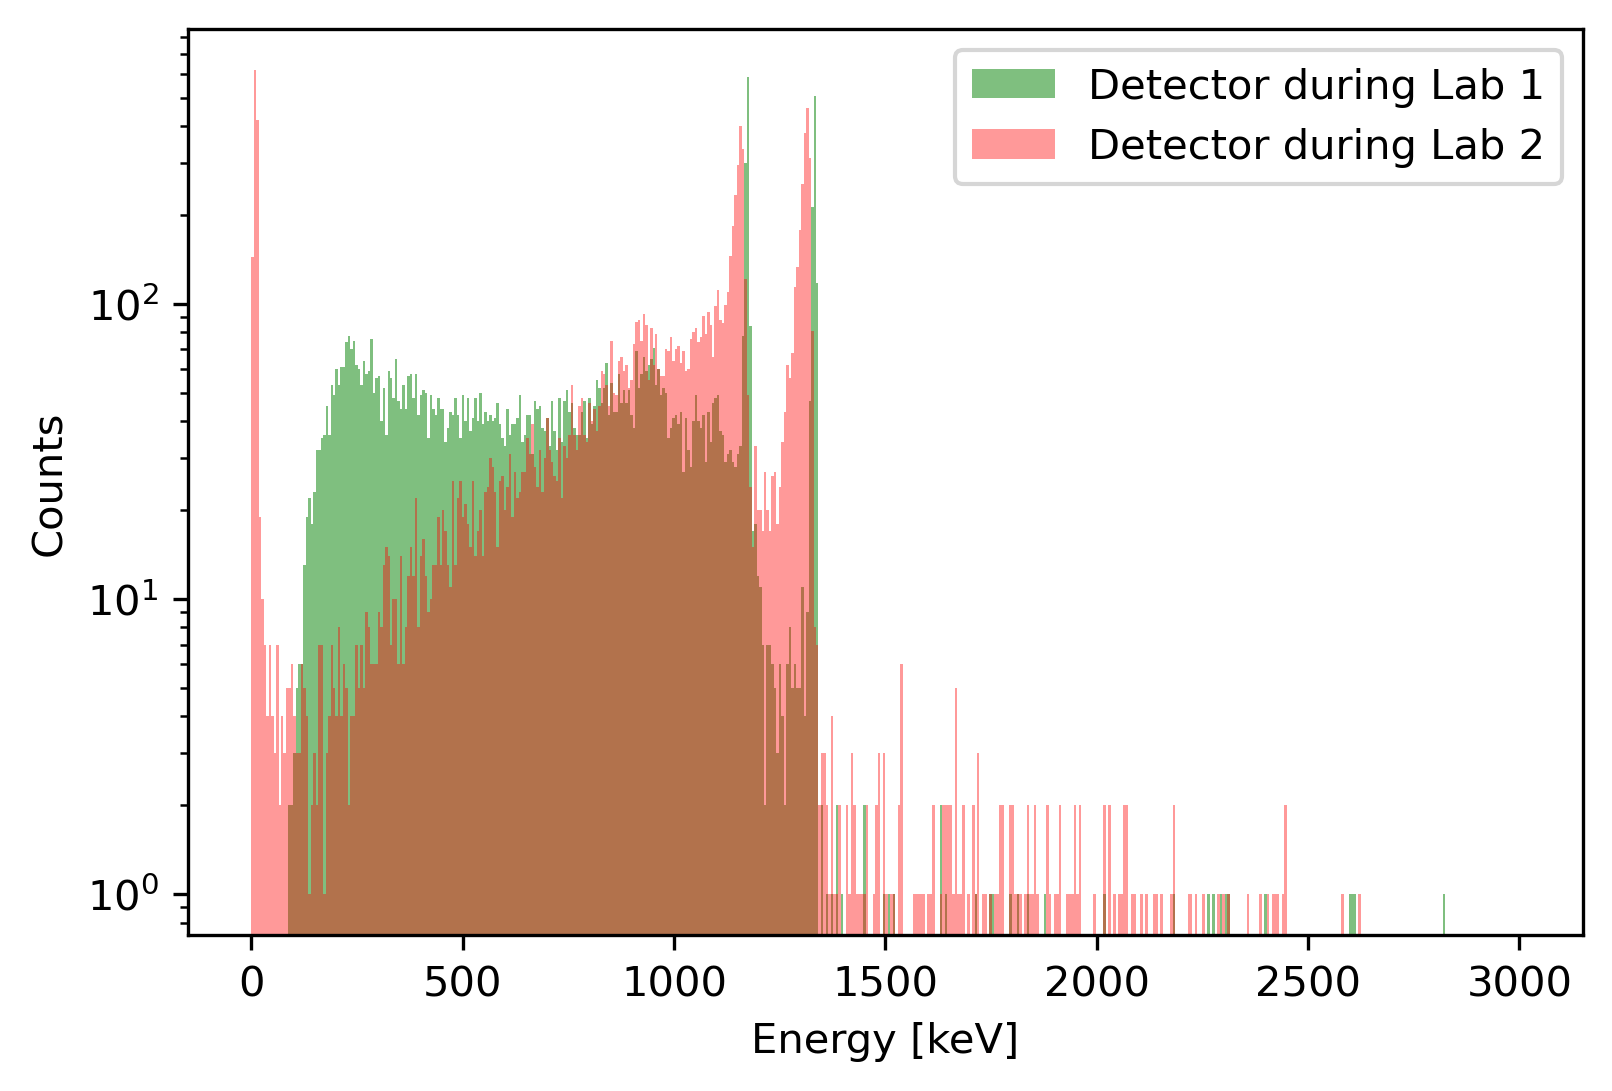

In [74]:
bins_ = np.linspace(0,3000,2**9+1)
plt.hist(energies_old, bins=bins_, color='green', alpha=0.5, label='Detector during Lab 1')
plt.hist(energies_new, bins=bins_, color='red', alpha=0.4, label='Detector during Lab 2')
plt.legend()
plt.semilogy()
#plt.title('Detector Failing Comparison')
plt.ylabel('Counts')
plt.xlabel('Energy [keV]')
plt.savefig('Plots/lab1-lab2-detector-comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [3]:
data, sat = import_data('../Lab-1/Data/Combined_Data/Cs137-24in-2.h5')
energies, energies_inds = import_lab1_energies('Cs137', indexes=True)

Checking for Saturation:   0%|          | 0/16145 [00:00<?, ?it/s]

Loading in calibrated Cs137 spectra


In [4]:
cs_photopeak_inds = np.argwhere((energies>=652) & (energies<=670))
cs_photopeak_inds = cs_photopeak_inds.reshape(len(cs_photopeak_inds),)
cs_photopeak_inds = energies_inds[cs_photopeak_inds]

cs_photopeak = np.copy(data[cs_photopeak_inds])

cs_photopeak_zero, inds = [], []
for p in tqdm(range(len(cs_photopeak))):
    try:
        start = determine_rise(savgol_filter(cs_photopeak[p][:2200], 51, 0))
        #start = CFD(cs_photopeak[p][:2200], 0.025, samp_size=50)-250
        #sig = savgol_filter(reset_zero(cs_photopeak[p][start:start+1100]), 51, 0)
        sig = reset_zero(cs_photopeak[p][start:start+1100], samp_size=50)
        cs_photopeak_zero.append(sig/max(sig))
        inds.append(p)
    except:
        print('Index {} failed for some reason?'.format(p))
        pass
inds = np.array(inds)
cs_photopeak_zero = np.array(cs_photopeak_zero)

  0%|          | 0/4547 [00:00<?, ?it/s]

Index 662 failed for some reason?


## Pileup Pulses

In [18]:
pileup = possible_pileup(data, 500, 2500, 15000)

Detecting Pileup:   0%|          | 0/16145 [00:00<?, ?it/s]

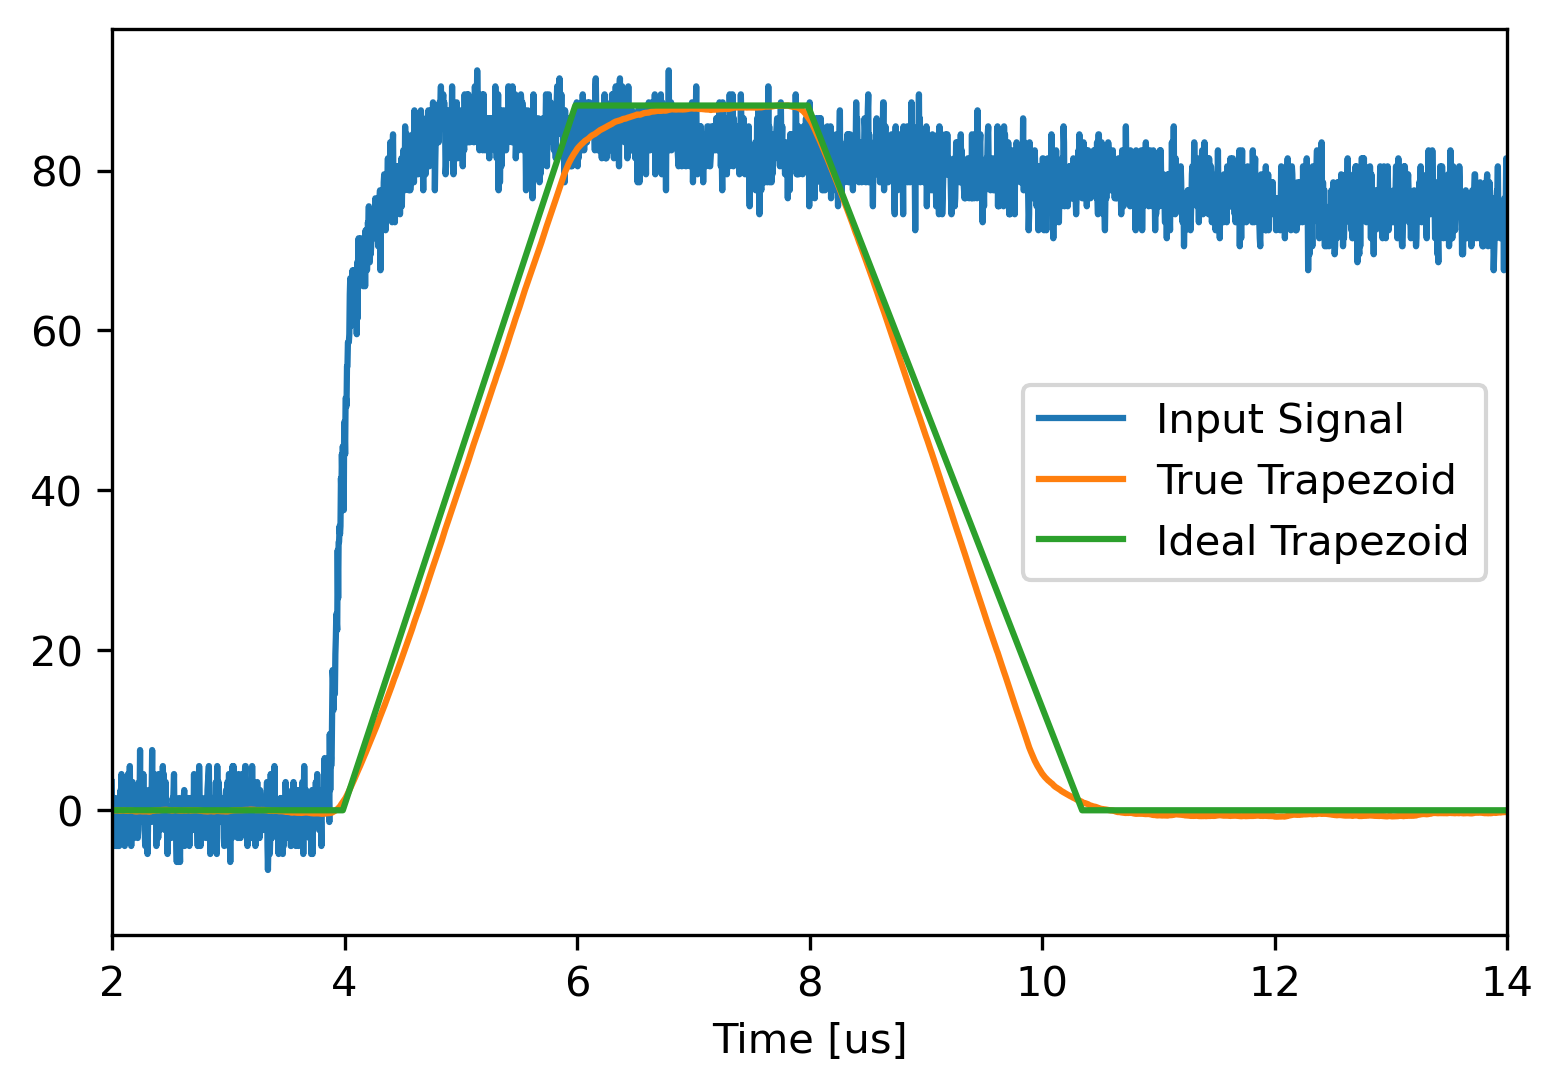

In [22]:
p = 550
xmax = 3500
plt.plot(reset_zero(data[p]), label='Input Signal')
peak, gap = 500, 500
trap = trapezoid_filter(data[p], peak, gap, 15000)
sr, er = np.argwhere(trap[:xmax] > 1)[0,0], np.argwhere(trap[:xmax] > 1)[-1,0]
plt.plot(trap, label='True Trapezoid')
#plt.axvline(sr, color='r')
plt.plot(trapezoid(np.arange(xmax), sr+peak, sr+peak+gap, np.max(trap), sr, er, 0), label='Ideal Trapezoid')
plt.xlim(500,xmax)
plt.legend()

ax = plt.gca()

labels = (np.array(range(500,4000,500))*4e-3).astype(int)

ax.set_xticklabels(labels)
plt.xlabel('Time [us]')

plt.savefig('Plots/ideal-true-trapezoid.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

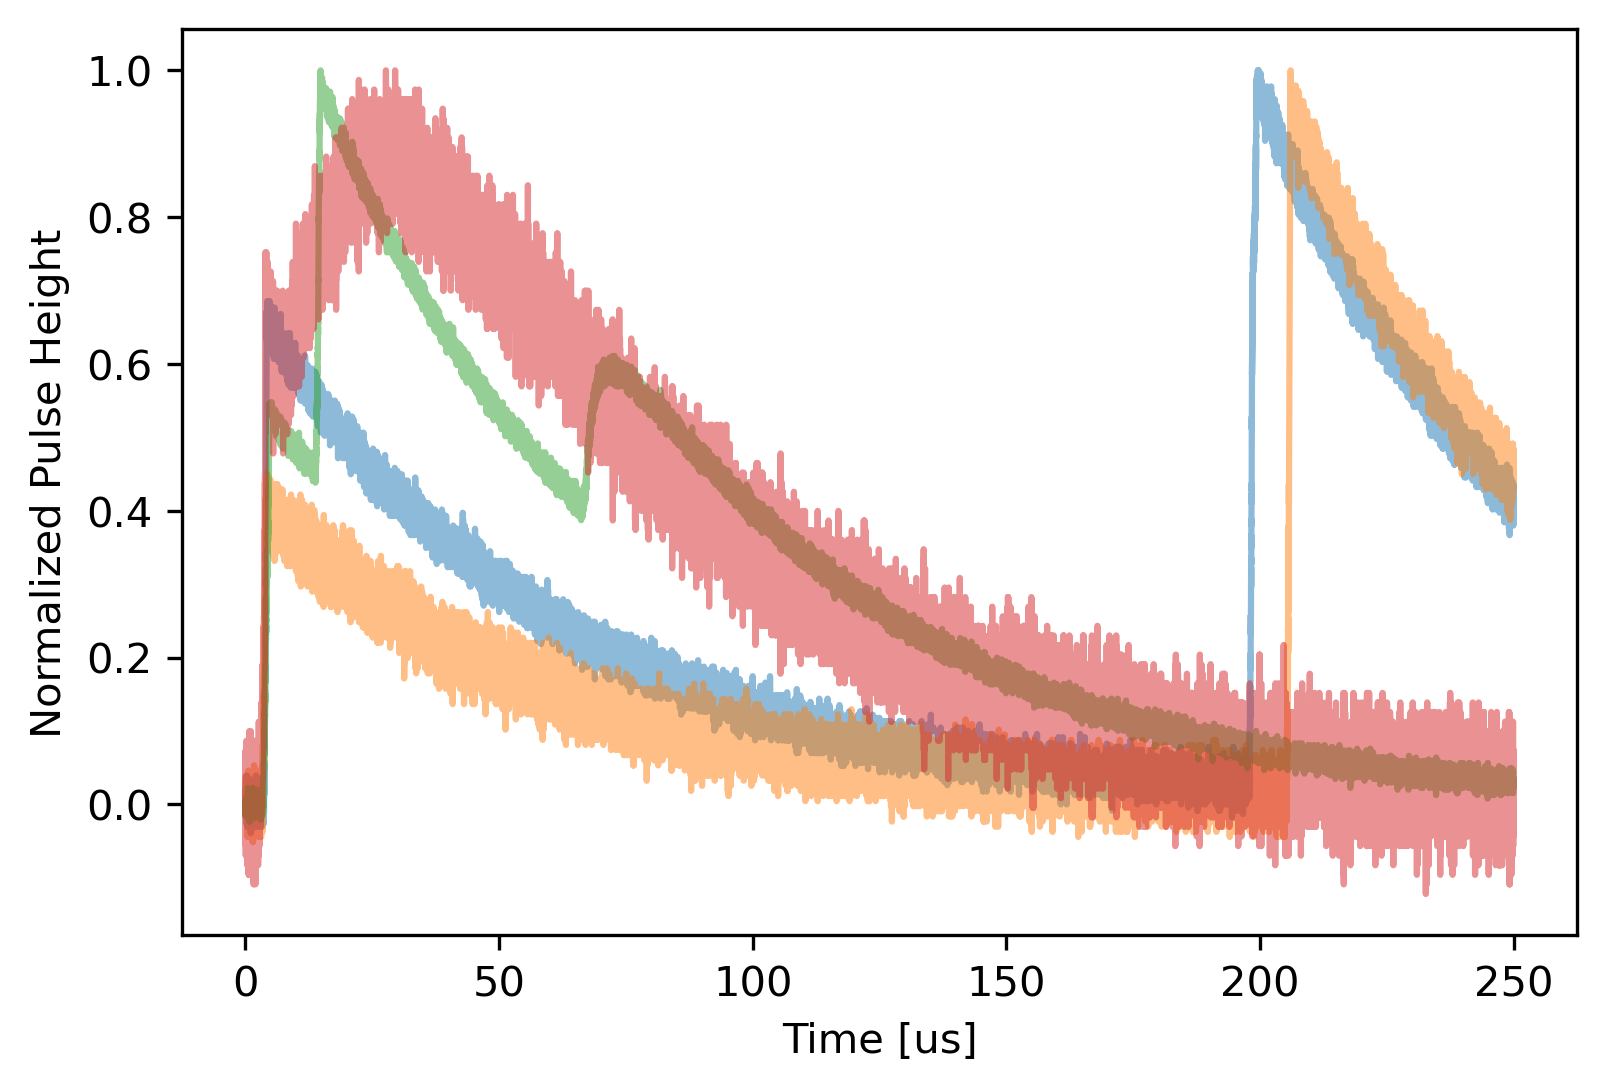

In [20]:
plt.plot(4e-3*np.arange(len(data[0])), reset_zero(data[pileup[12]])/max(reset_zero(data[pileup[12]])), alpha=0.5)
plt.plot(4e-3*np.arange(len(data[0])), reset_zero(data[pileup[22]])/max(reset_zero(data[pileup[22]])), alpha=0.5)
plt.plot(4e-3*np.arange(len(data[0])), reset_zero(data[pileup[35]])/max(reset_zero(data[pileup[35]])), alpha=0.5)
plt.plot(4e-3*np.arange(len(data[0])), reset_zero(data[pileup[53]])/max(reset_zero(data[pileup[53]])), alpha=0.5)
plt.xlabel('Time [us]')
plt.ylabel('Normalized Pulse Height')
plt.savefig('Plots/pileup-pulses.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

## New Trapezoid Comparison

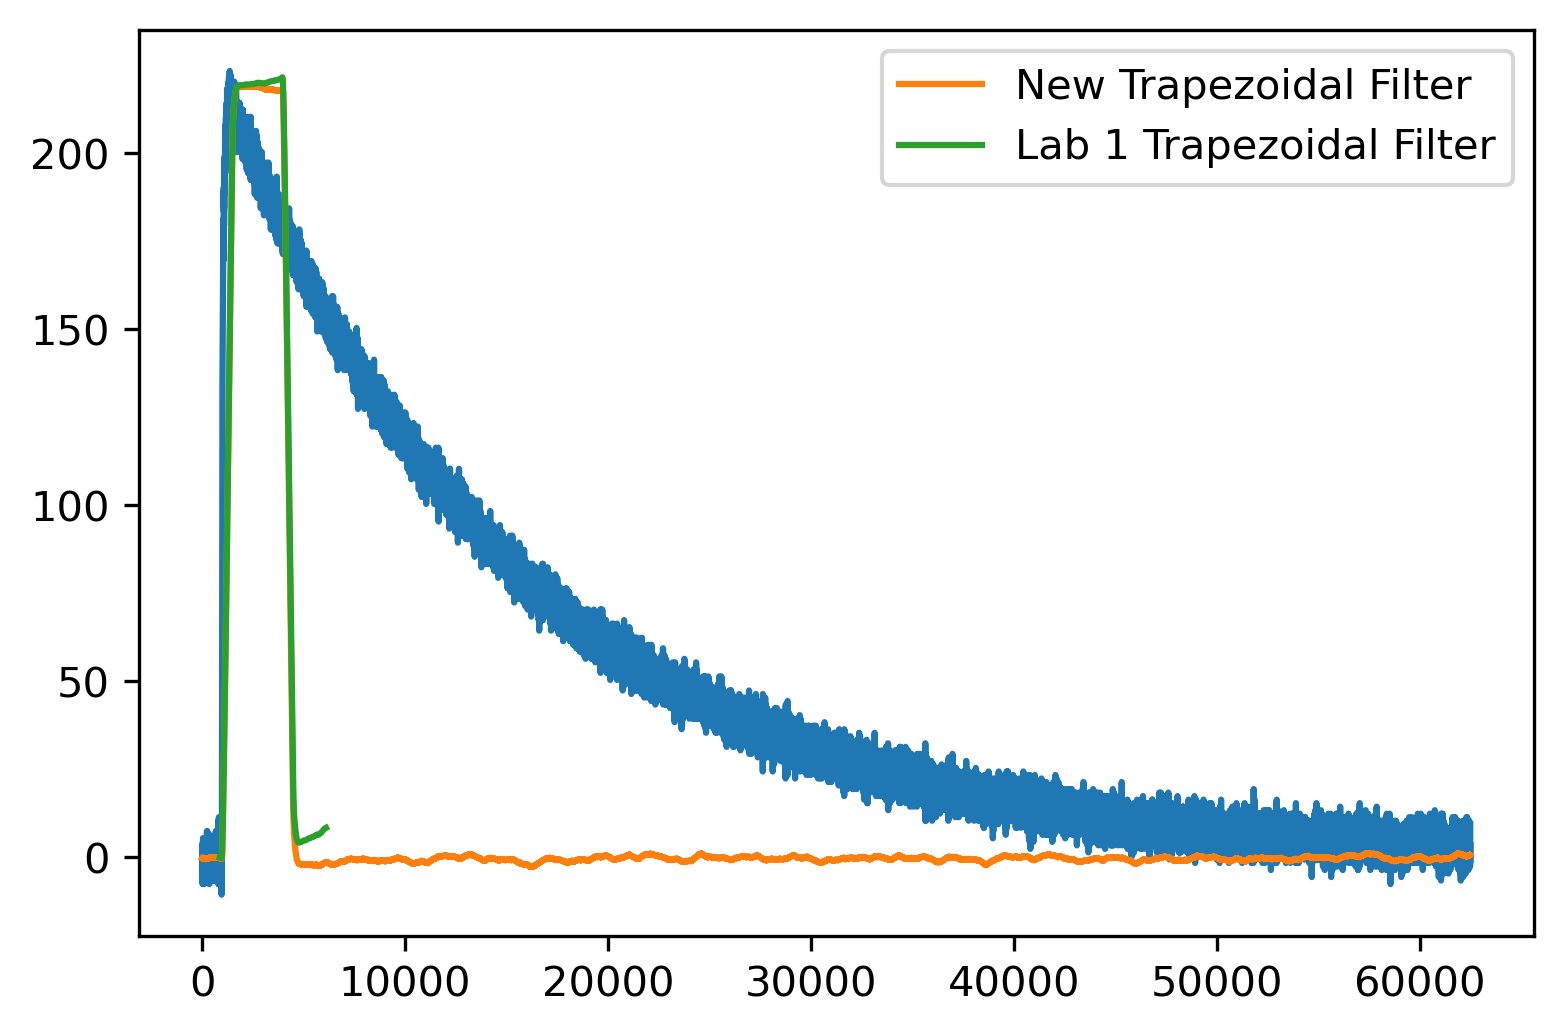

In [70]:
i = 3
plt.plot(reset_zero(data[i]))
#plt.plot(MWD(data[i], 2000, 14000))
plt.plot(trapezoid_filter(data[i], 500, 2500, 15000), label='New Trapezoidal Filter')
od = savgol_filter(data[i], 51, 0)
ot = (1/500)*s(od, determine_rise(od), 15000, 500, 2500)
plt.plot(np.arange(len(ot))+determine_rise(od), ot, label='Lab 1 Trapezoidal Filter')
#plt.axhline(0, color='black')
plt.legend()
plt.savefig('Plots/old_new_trapezoid_comparison.png', dpi=300, facecolor='white', bbox_inches='tight')
#plt.xlim(0,5000)

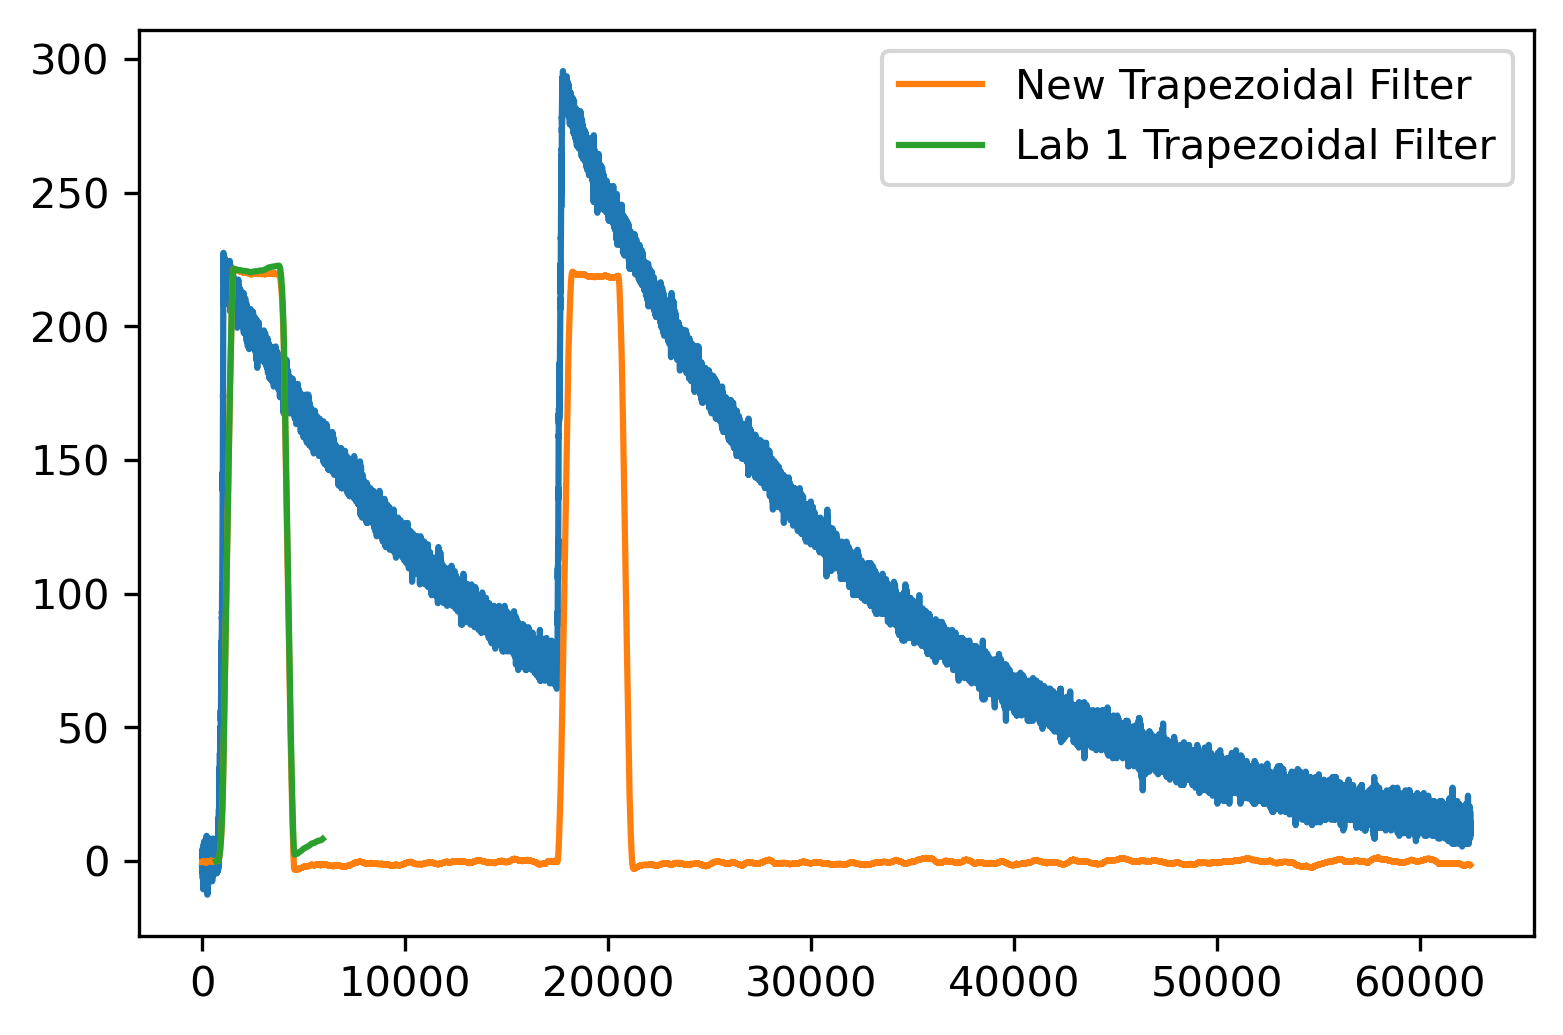

In [67]:
i = 1
plt.plot(reset_zero(data[i]))
#plt.plot(MWD(data[i], 2000, 14000))
plt.plot(trapezoid_filter(data[i], 500, 2500, 15000), label='New Trapezoidal Filter')
od = savgol_filter(data[i], 51, 0)
ot = (1/500)*s(od, determine_rise(od), 15000, 500, 2500)
plt.plot(np.arange(len(ot))+determine_rise(od), ot, label='Lab 1 Trapezoidal Filter')
#plt.axhline(0, color='black')
plt.legend()
plt.savefig('Plots/old_new_trapezoid_comparison_pileup.png', dpi=300, facecolor='white', bbox_inches='tight')
#plt.xlim(0,5000)

## Number of Clusters Optimization

In [5]:
# This takes about 5 minutes to run so re-run at your own choice
kmeans_avg_values, inertia, inves = [], [], range(1, 101, 1)
for n in tqdm(inves):
    test = cluster_data(cs_photopeak_zero, n, quality=True)
    kmeans_avg_values.append(test[0])
    inertia.append(test[1])
kmeans_avg_values = np.array(kmeans_avg_values)
inertia = np.array(inertia)

  0%|          | 0/100 [00:00<?, ?it/s]

The optimal number of clusters is: 9


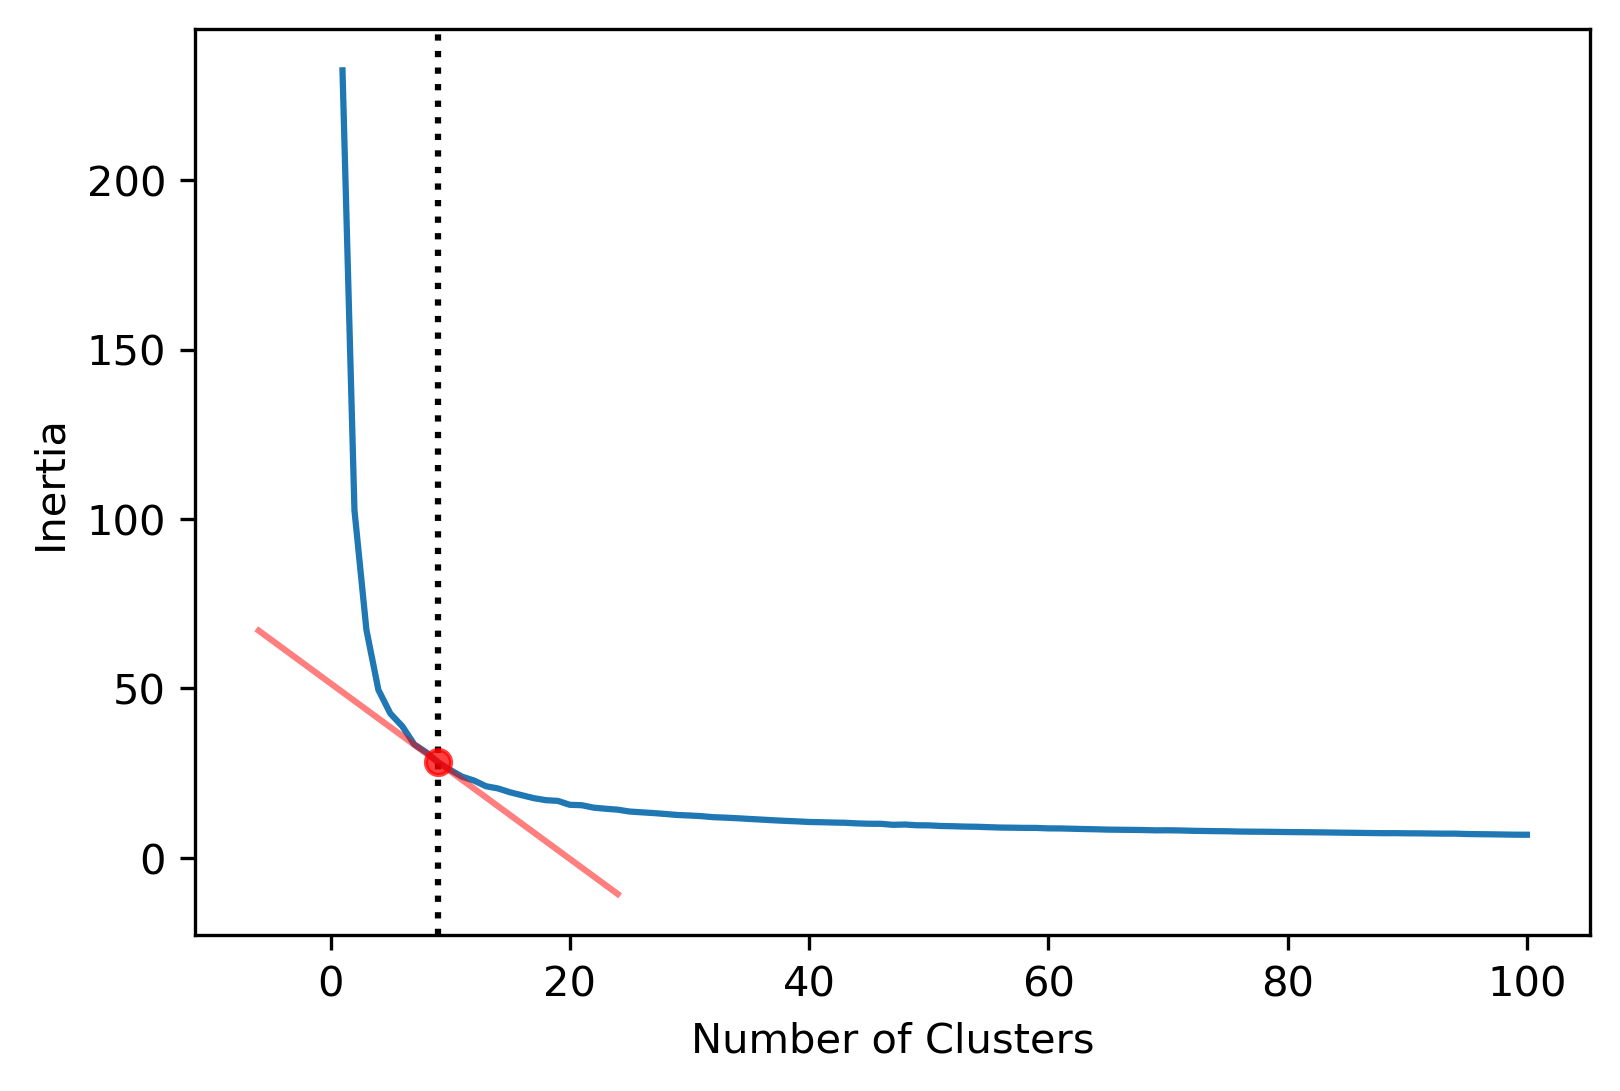

In [9]:
kl = KneeLocator(inves, kmeans_avg_values, curve="convex", direction="decreasing")

print('The optimal number of clusters is: {}'.format(kl.knee))

plt.plot(inves, kmeans_avg_values)
plt.axvline(kl.knee, color='black', linestyle=':')
xt, yt = tangent_line(inves, kmeans_avg_values, kl.knee, width=30)
plt.plot(xt, yt, alpha=0.5, color='red', zorder=2)
plt.scatter(kl.knee, kmeans_avg_values[inves.index(kl.knee)], zorder=2, color='red', alpha=0.75)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('Plots/cluster_weighted_inertia_final.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()

#### So I know that this now prints out that 9 clusters is the optimal number even though I used 10 as the final.
The problem is that I originally did all the number of clusters optimizations before I implemented any form of pileup rejection really, so clearly the values are very slightly different. This isn't a huge deal, as including 1 more cluster than the true "optimal" is only an improvement anyways.

## Clustering Data w/ 10 Clusters

In [11]:
n = 10
kmeans = cluster_data(cs_photopeak_zero, n, quality=False)

In [14]:
mod_data, mod_inds = [], []
for p in tqdm(range(len(data))):
    try:
        start = determine_rise(savgol_filter(data[p][:2200], 51, 0))
        sig = reset_zero(data[p][start:start+1100], samp_size=50)
        mod_data.append(sig/max(sig))
        mod_inds.append(p)
    except:
        print('Index {} failed for some reason?'.format(p))
        pass
mod_inds = np.array(mod_inds)
mod_data = np.array(mod_data)

  0%|          | 0/16145 [00:00<?, ?it/s]

Index 2322 failed for some reason?
Index 9501 failed for some reason?


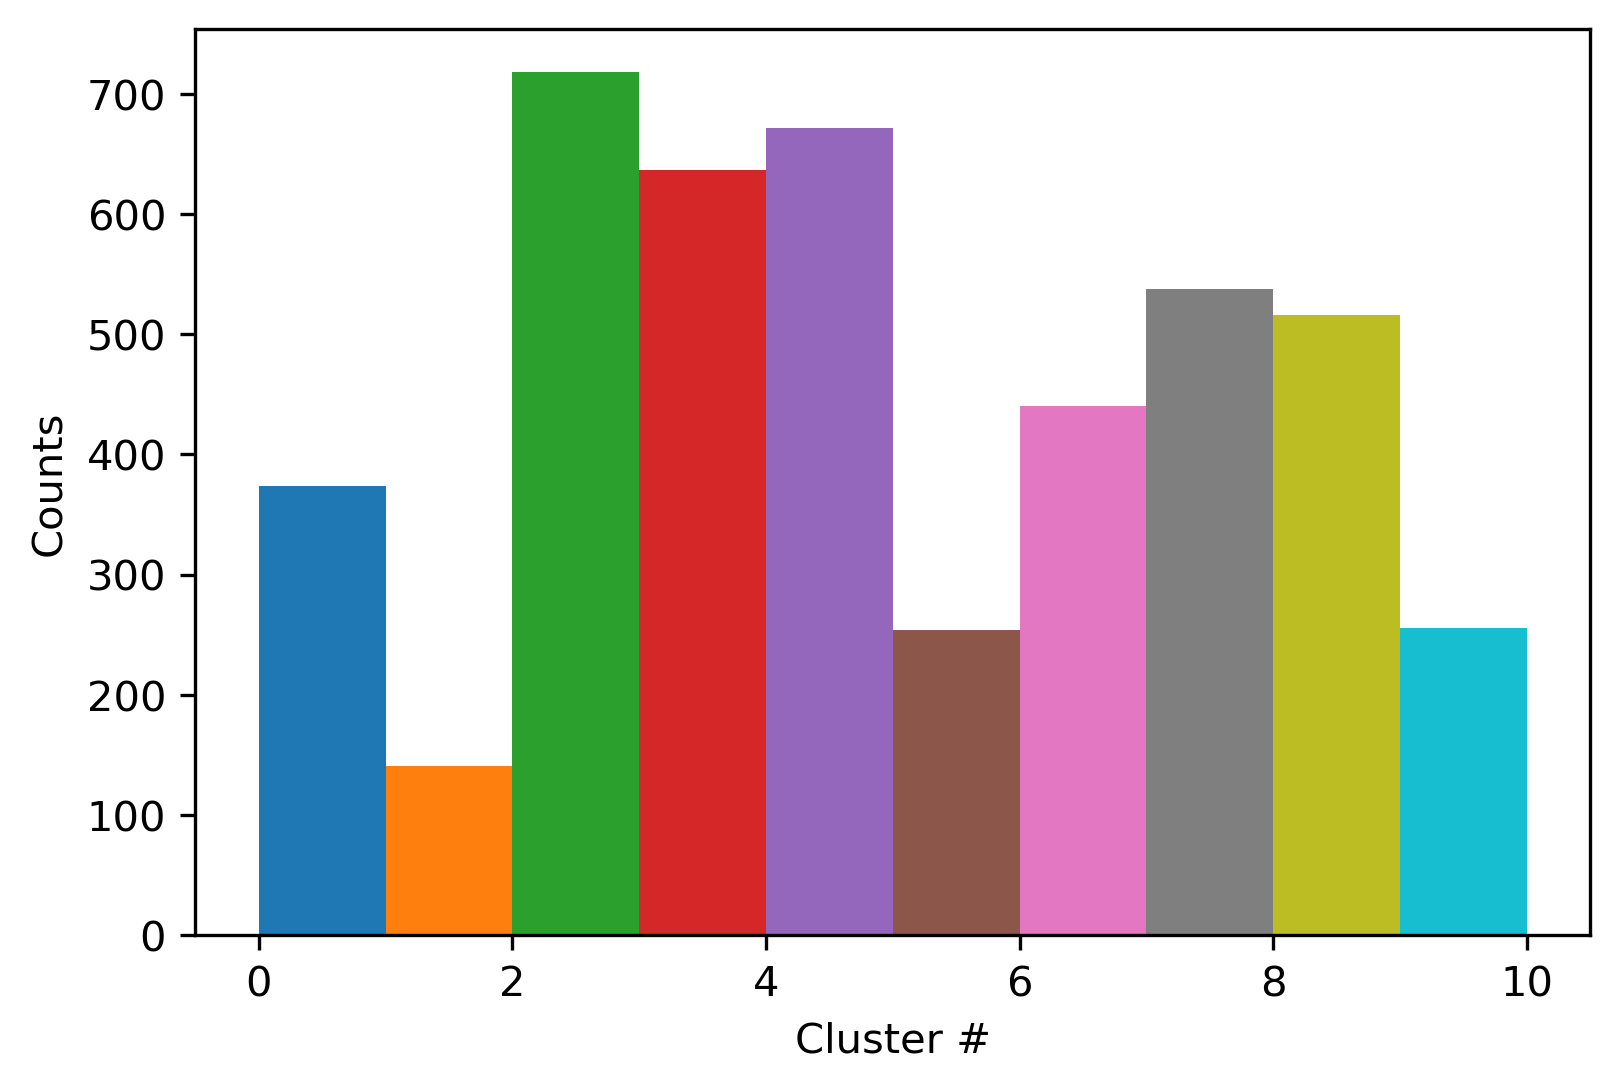

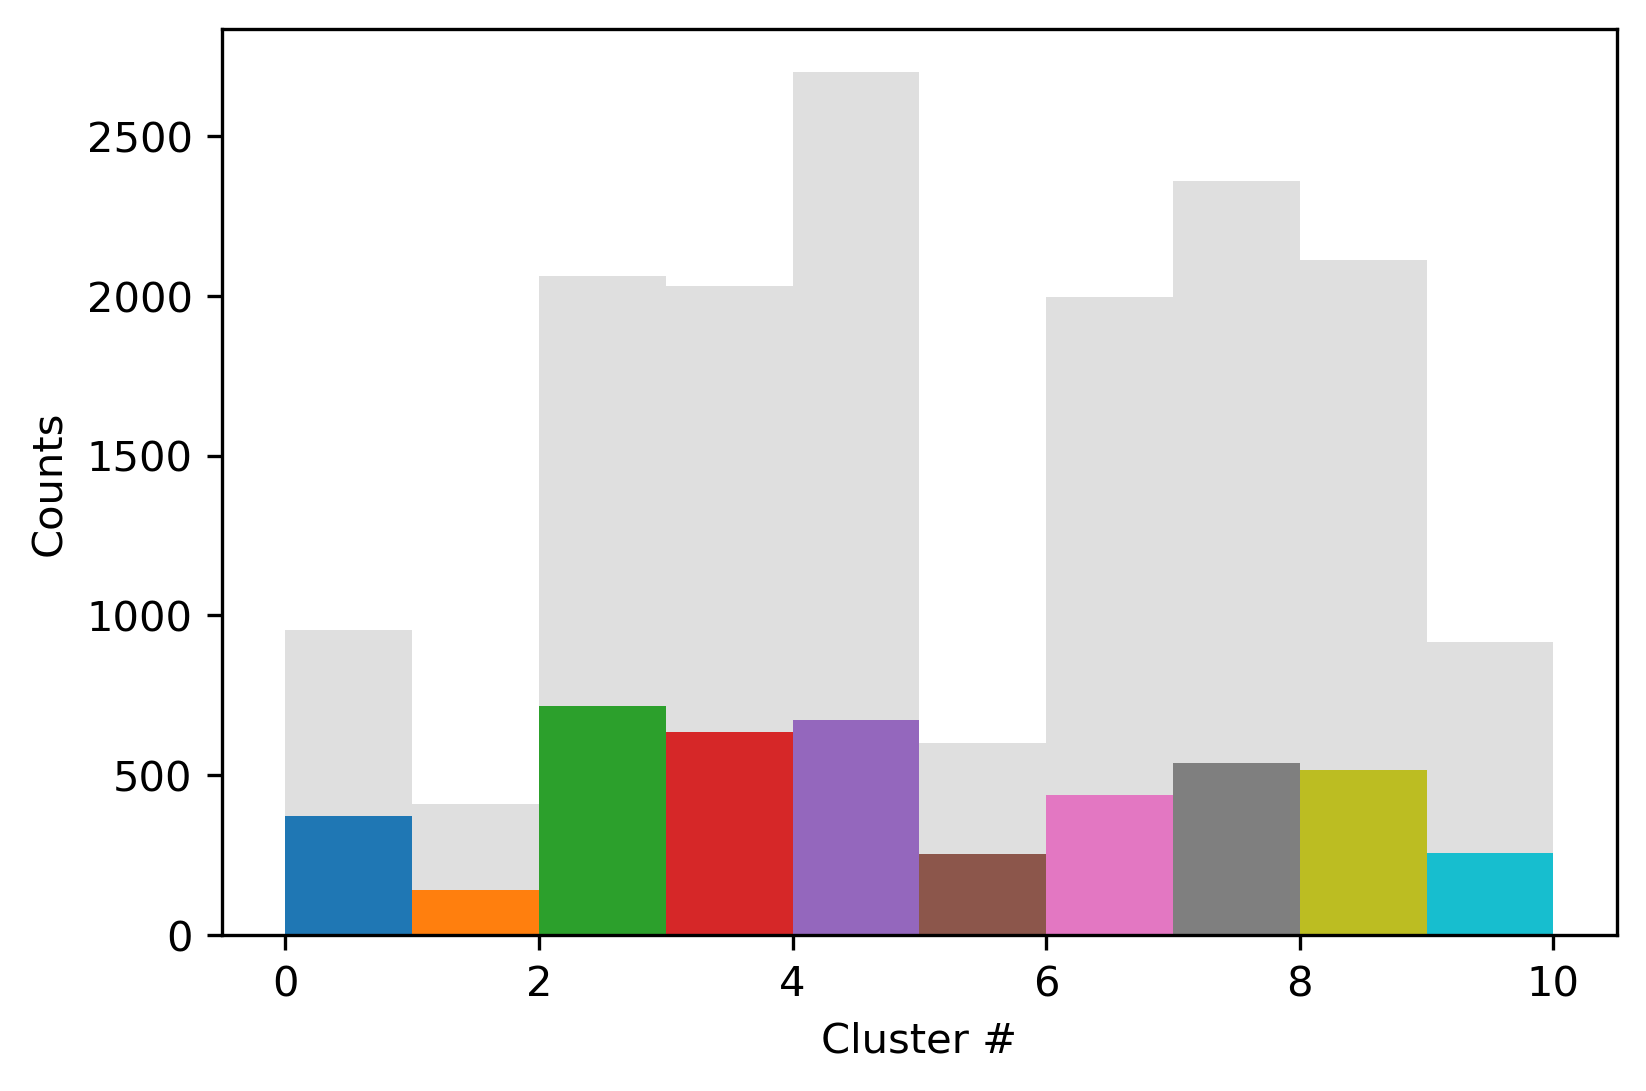

In [15]:
test = kmeans.predict(mod_data)

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, n))

#c2,b2,patches2 = plt.hist(test, bins=np.arange(n+1), alpha=0.25, color='grey')
c,b,patches = plt.hist(kmeans.labels_, bins=np.arange(n+1)) #, alpha=0.5)
#plt.axhline(1, color='r')
for p in range(len(patches)):
    patches[p].set_facecolor(colors[p])
    #patches2[p].set_facecolor(colors[p])
plt.ylabel('Counts')
plt.xlabel('Cluster #')
plt.savefig('Plots/clusters_distribution.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

c2,b2,patches2 = plt.hist(test, bins=np.arange(n+1), alpha=0.25, color='grey')
c,b,patches = plt.hist(kmeans.labels_, bins=np.arange(n+1)) #, alpha=0.5)
for p in range(len(patches)):
    patches[p].set_facecolor(colors[p])
    #patches2[p].set_facecolor(colors[p])
plt.ylabel('Counts')
plt.xlabel('Cluster #')
plt.savefig('Plots/clusters_distribution_all.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

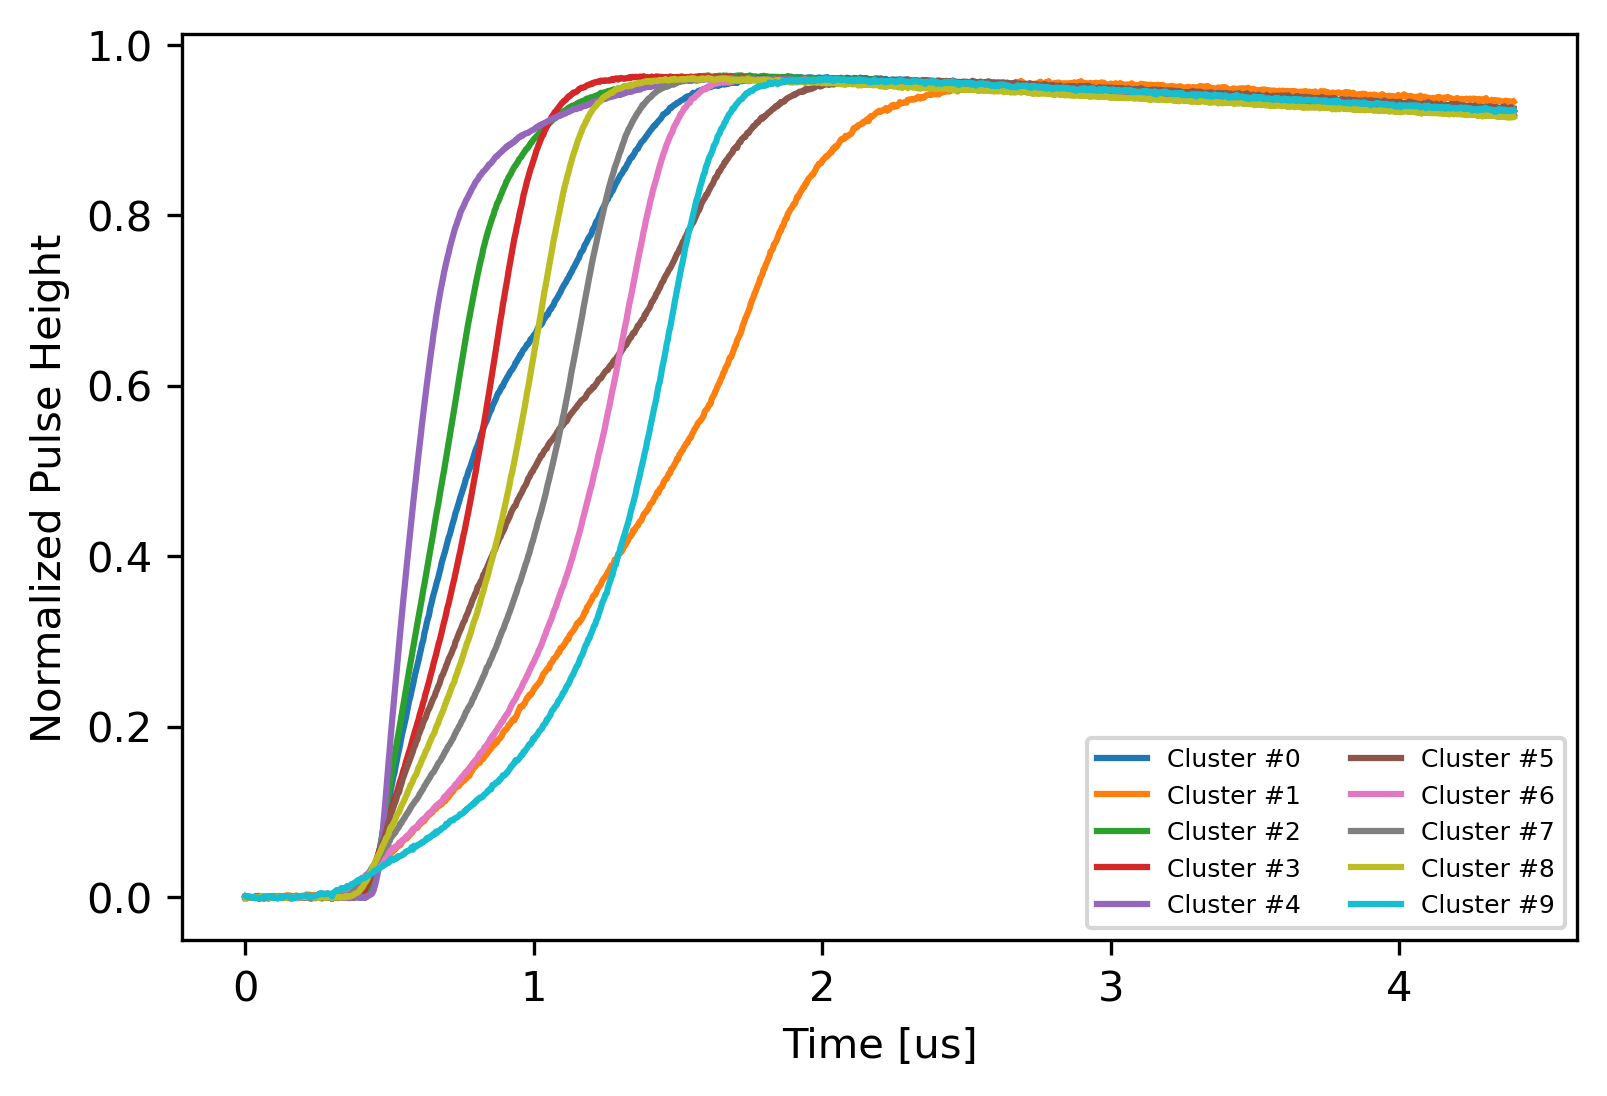

In [23]:
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, n))

for k in range(n):
    plt.plot(4e-3*np.arange(len(kmeans.cluster_centers_[k])), kmeans.cluster_centers_[k],
             color=colors[k], alpha=1, label='Cluster #{}'.format(k))
plt.legend(ncol=2, fontsize=6)
plt.ylabel('Normalized Pulse Height')
plt.xlabel('Time [us]')
plt.savefig('Plots/clusters_centers.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

## Cluster Optimization

In [24]:
energies_clusters = []
pulses_clusters = []
for b in range(10):
    pulses = data[cs_photopeak_inds[inds[np.argwhere(kmeans.labels_==b)[:,0]]]]
    pulses_clusters.append(pulses)
    energies_clusters.append(calibrate_pulses(pulses))

Creating spectra:   0%|          | 0/374 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/141 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/718 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/637 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/672 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/254 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/440 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/538 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/516 [00:00<?, ?it/s]

Creating spectra:   0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
# CAUTION: This one takes hours and hours to run, I promise it works
for cluster in tqdm(range(n)):
    means, stds, parameters = optimize_trapezoid_parameters(pulses_clusters[cluster], 652, 670)
    #optimimums.append(parameters[np.argmin(stds)])
    
    try:
        os.mkdir('Data/Clusters-Optimization')
    except:
        pass
    
    np.save('Data/Clusters-Optimization/means_cluster_{}.npy'.format(cluster), means)
    np.save('Data/Clusters-Optimization/stds_cluster_{}.npy'.format(cluster), stds)

    plt.imshow(np.flipud(stds), extent=(500, 2500, 200, 600), aspect='auto', cmap='plasma')
    plt.xlabel('Gap Time')
    plt.ylabel('Peaking Time')
    plt.title('Cluster {} Optimization'.format(cluster))
    plt.colorbar(label='Standard Deviation [keV]')
    plt.savefig('Plots/Clusters-Optimization/STD-Cluster-{}.png'.format(cluster), dpi=300, facecolor='white', bbox_inches='tight')
    plt.close()

    plt.imshow(np.flipud(stds), extent=(500, 2500, 200, 600), aspect='auto', cmap='plasma')
    plt.xlabel('Gap Time')
    plt.ylabel('Peaking Time')
    plt.title('Cluster {} Optimization\nOptimum at P{} G{}'.format(cluster, parameters[np.argmin(stds)][0], parameters[np.argmin(stds)][1]))
    plt.colorbar(label='Standard Deviation [keV]')
    plt.scatter(parameters[np.argmin(stds)][1], parameters[np.argmin(stds)][0], s=10, edgecolors='black', color='red')
    plt.savefig('Plots/Clusters-Optimization/Optimum-STD-Cluster-{}.png'.format(cluster), dpi=300, facecolor='white', bbox_inches='tight')
    plt.close()

    plt.imshow(np.flipud(means), extent=(500, 2500, 200, 600), aspect='auto', cmap='magma')
    plt.xlabel('Gap Time')
    plt.ylabel('Peaking Time')
    plt.title('Cluster {} Energies'.format(cluster))
    plt.colorbar(label='Peak Energy [keV]')
    plt.savefig('Plots/Clusters-Optimization/Mean-Cluster-{}.png'.format(cluster), dpi=300, facecolor='white', bbox_inches='tight')
    plt.close()

In [25]:
peak_range = range(200, 610, 10)
gap_range = range(500, 2525, 25)
parameters = []
for p in peak_range:
    for g in gap_range:
        parameters.append([p, g])
parameters = np.array(parameters)

stds_all, means_all = [], []
for cluster in range(10):
    std_temp = np.load('Data/Clusters-Optimization/stds_cluster_{}.npy'.format(cluster))
    stds_all.append(std_temp)
    mean_temp = np.load('Data/Clusters-Optimization/means_cluster_{}.npy'.format(cluster))
    means_all.append(mean_temp)
stds_all = np.array(stds_all)
means_all = np.array(means_all)

optimums, std_clu = [], []

for cluster in range(10):
    optimums.append([list(parameters[np.argmin(stds_all[cluster])]),
                    661.657-means_all[cluster][np.unravel_index(np.argmin(stds_all[cluster]), stds_all[cluster].shape)],
                    stds_all[cluster][np.unravel_index(np.argmin(stds_all[cluster]), stds_all[cluster].shape)]])
    std_clu.append(stds_all[cluster][np.unravel_index(np.argmin(stds_all[cluster]), stds_all[cluster].shape)])

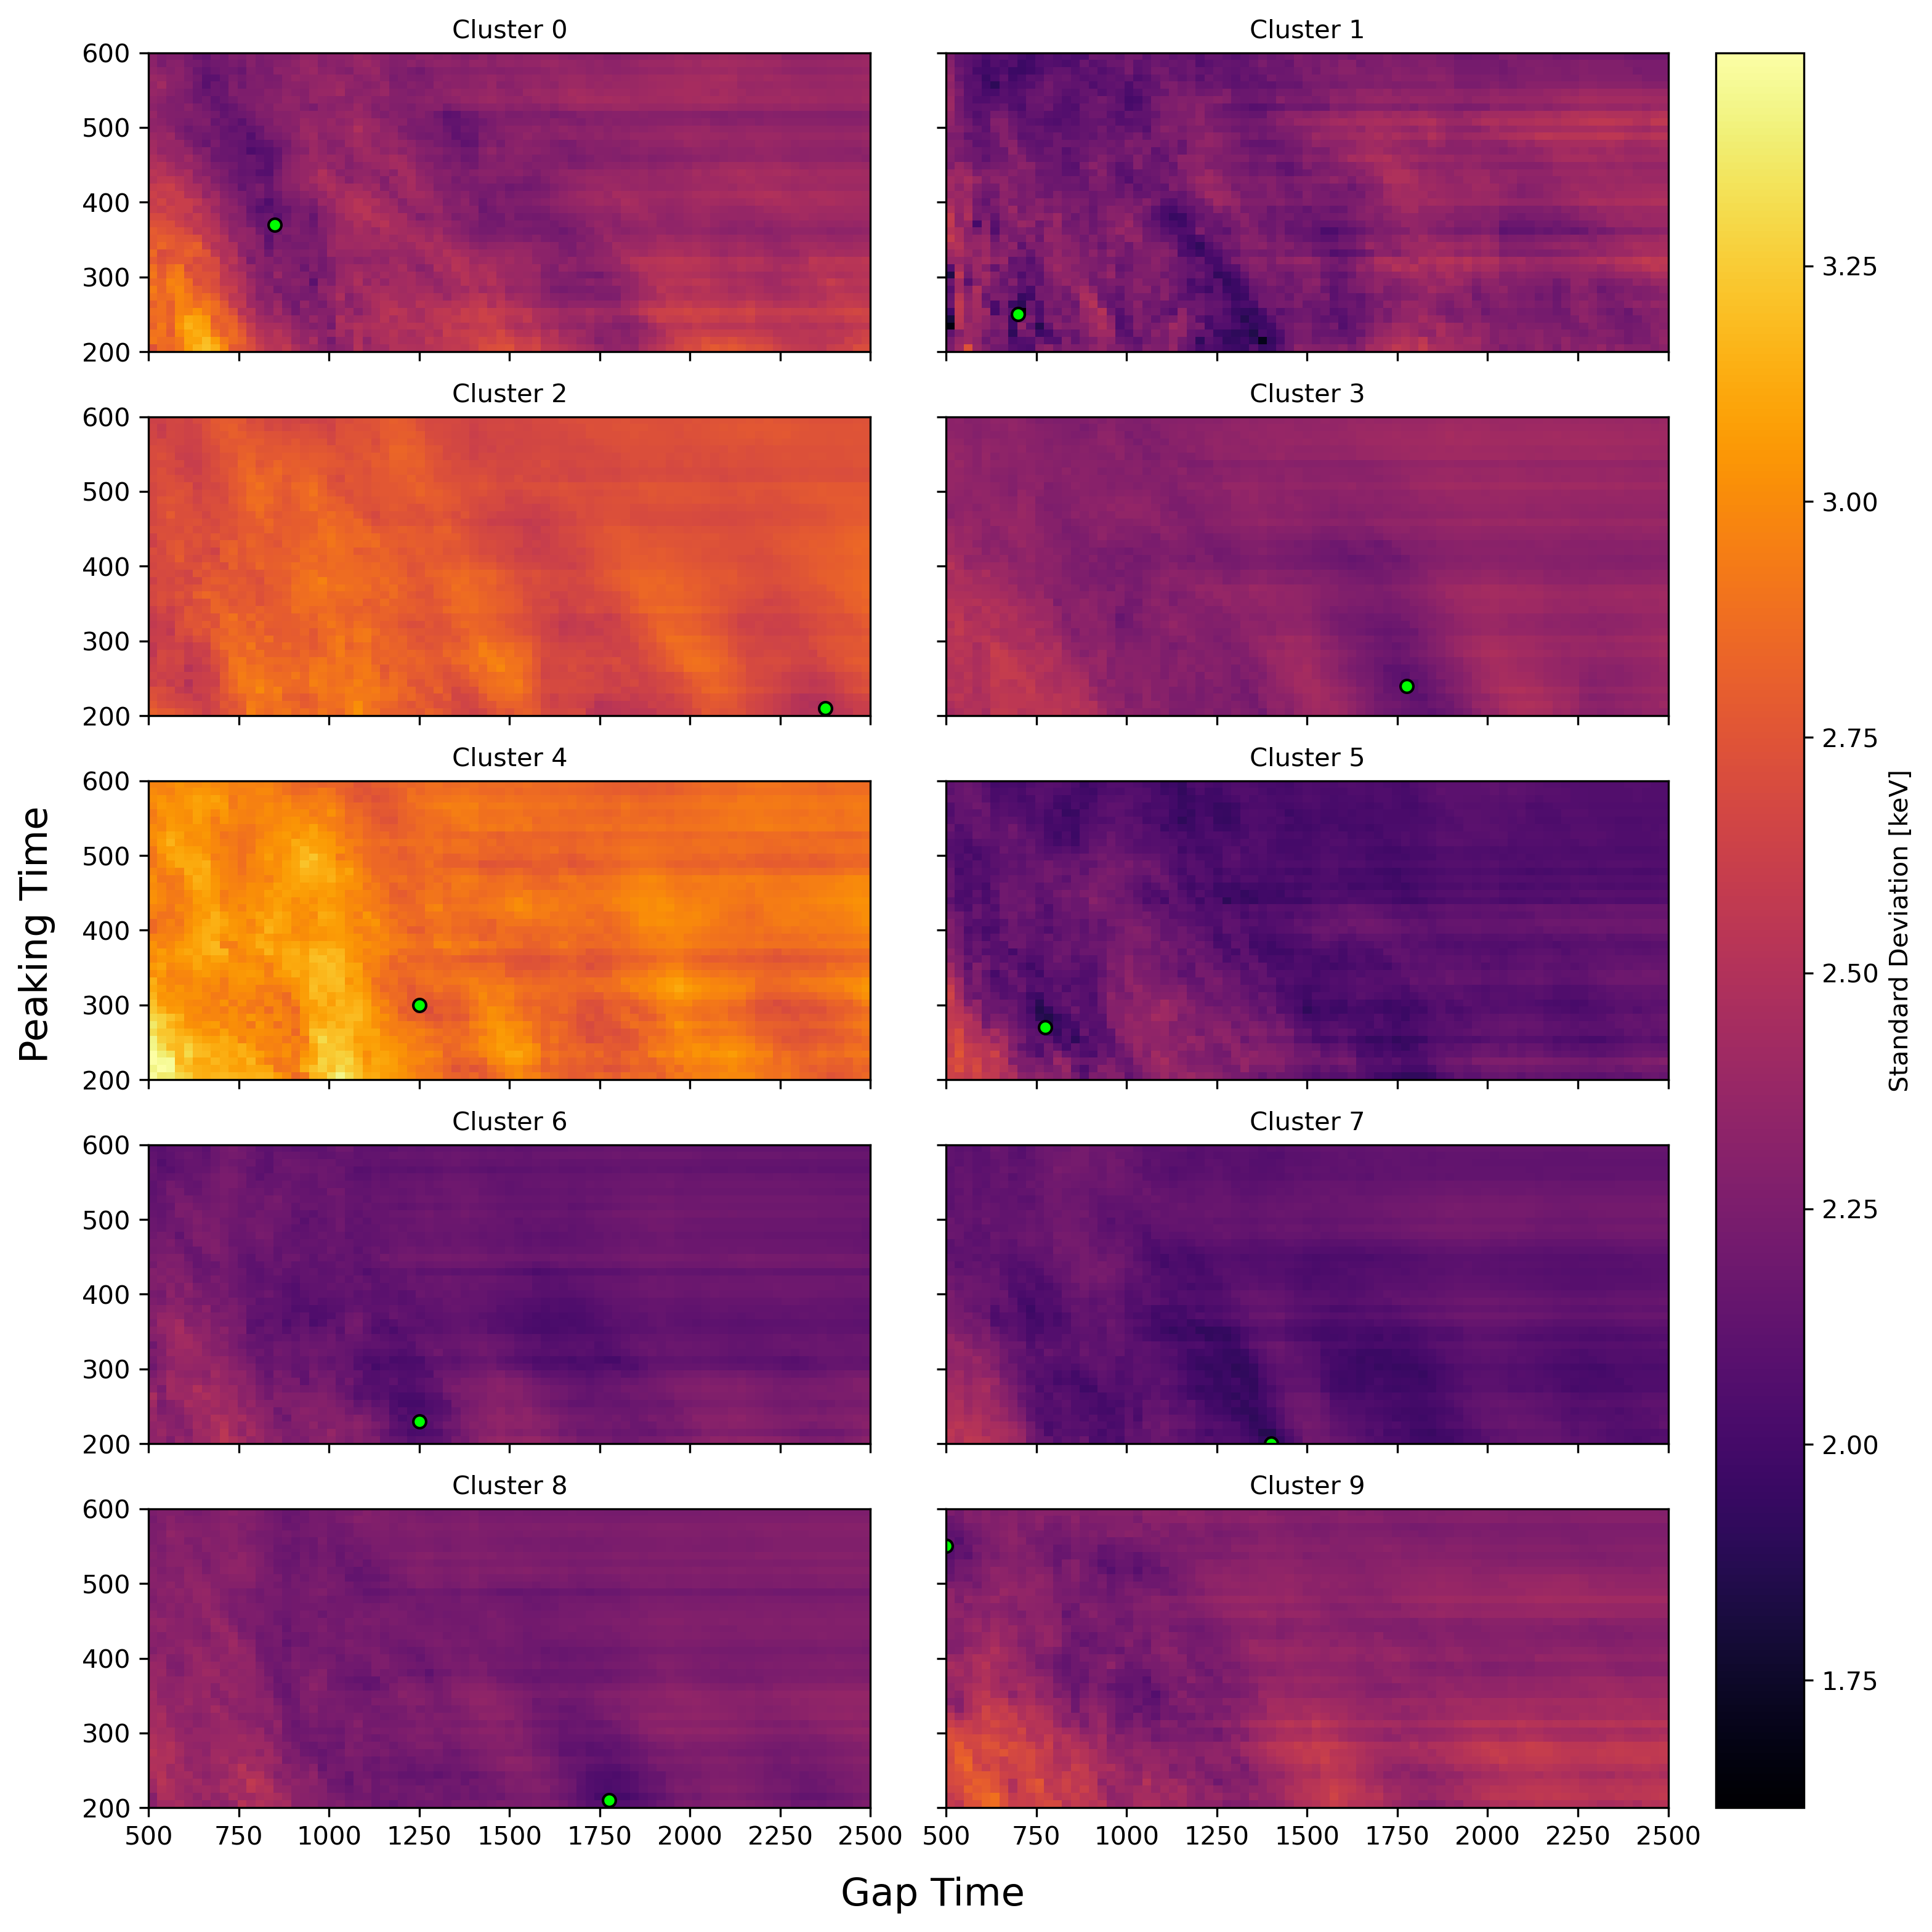

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=[10,10], constrained_layout=True)

cmap = cm.get_cmap('inferno')
normalizer = Normalize(np.min(stds_all),np.max(stds_all))
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

for cluster, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(stds_all[cluster]), extent=(500, 2500, 200, 600), aspect='auto', 
              cmap=cmap, norm=normalizer)
    ax.scatter(parameters[np.argmin(stds_all[cluster])][1], parameters[np.argmin(stds_all[cluster])][0], 
                s=25, edgecolors='black', color='lime')
    ax.set_title('Cluster {}'.format(cluster), fontsize=10)
fig.colorbar(im, ax=axes.ravel().tolist(), label='Standard Deviation [keV]', pad=0.01)

fig.supxlabel('Gap Time', x=0.465, y=-0.03, fontsize=15)
fig.supylabel('Peaking Time', x=-0.03, fontsize=15)
plt.savefig('Plots/all_clusters_optimized_std.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()


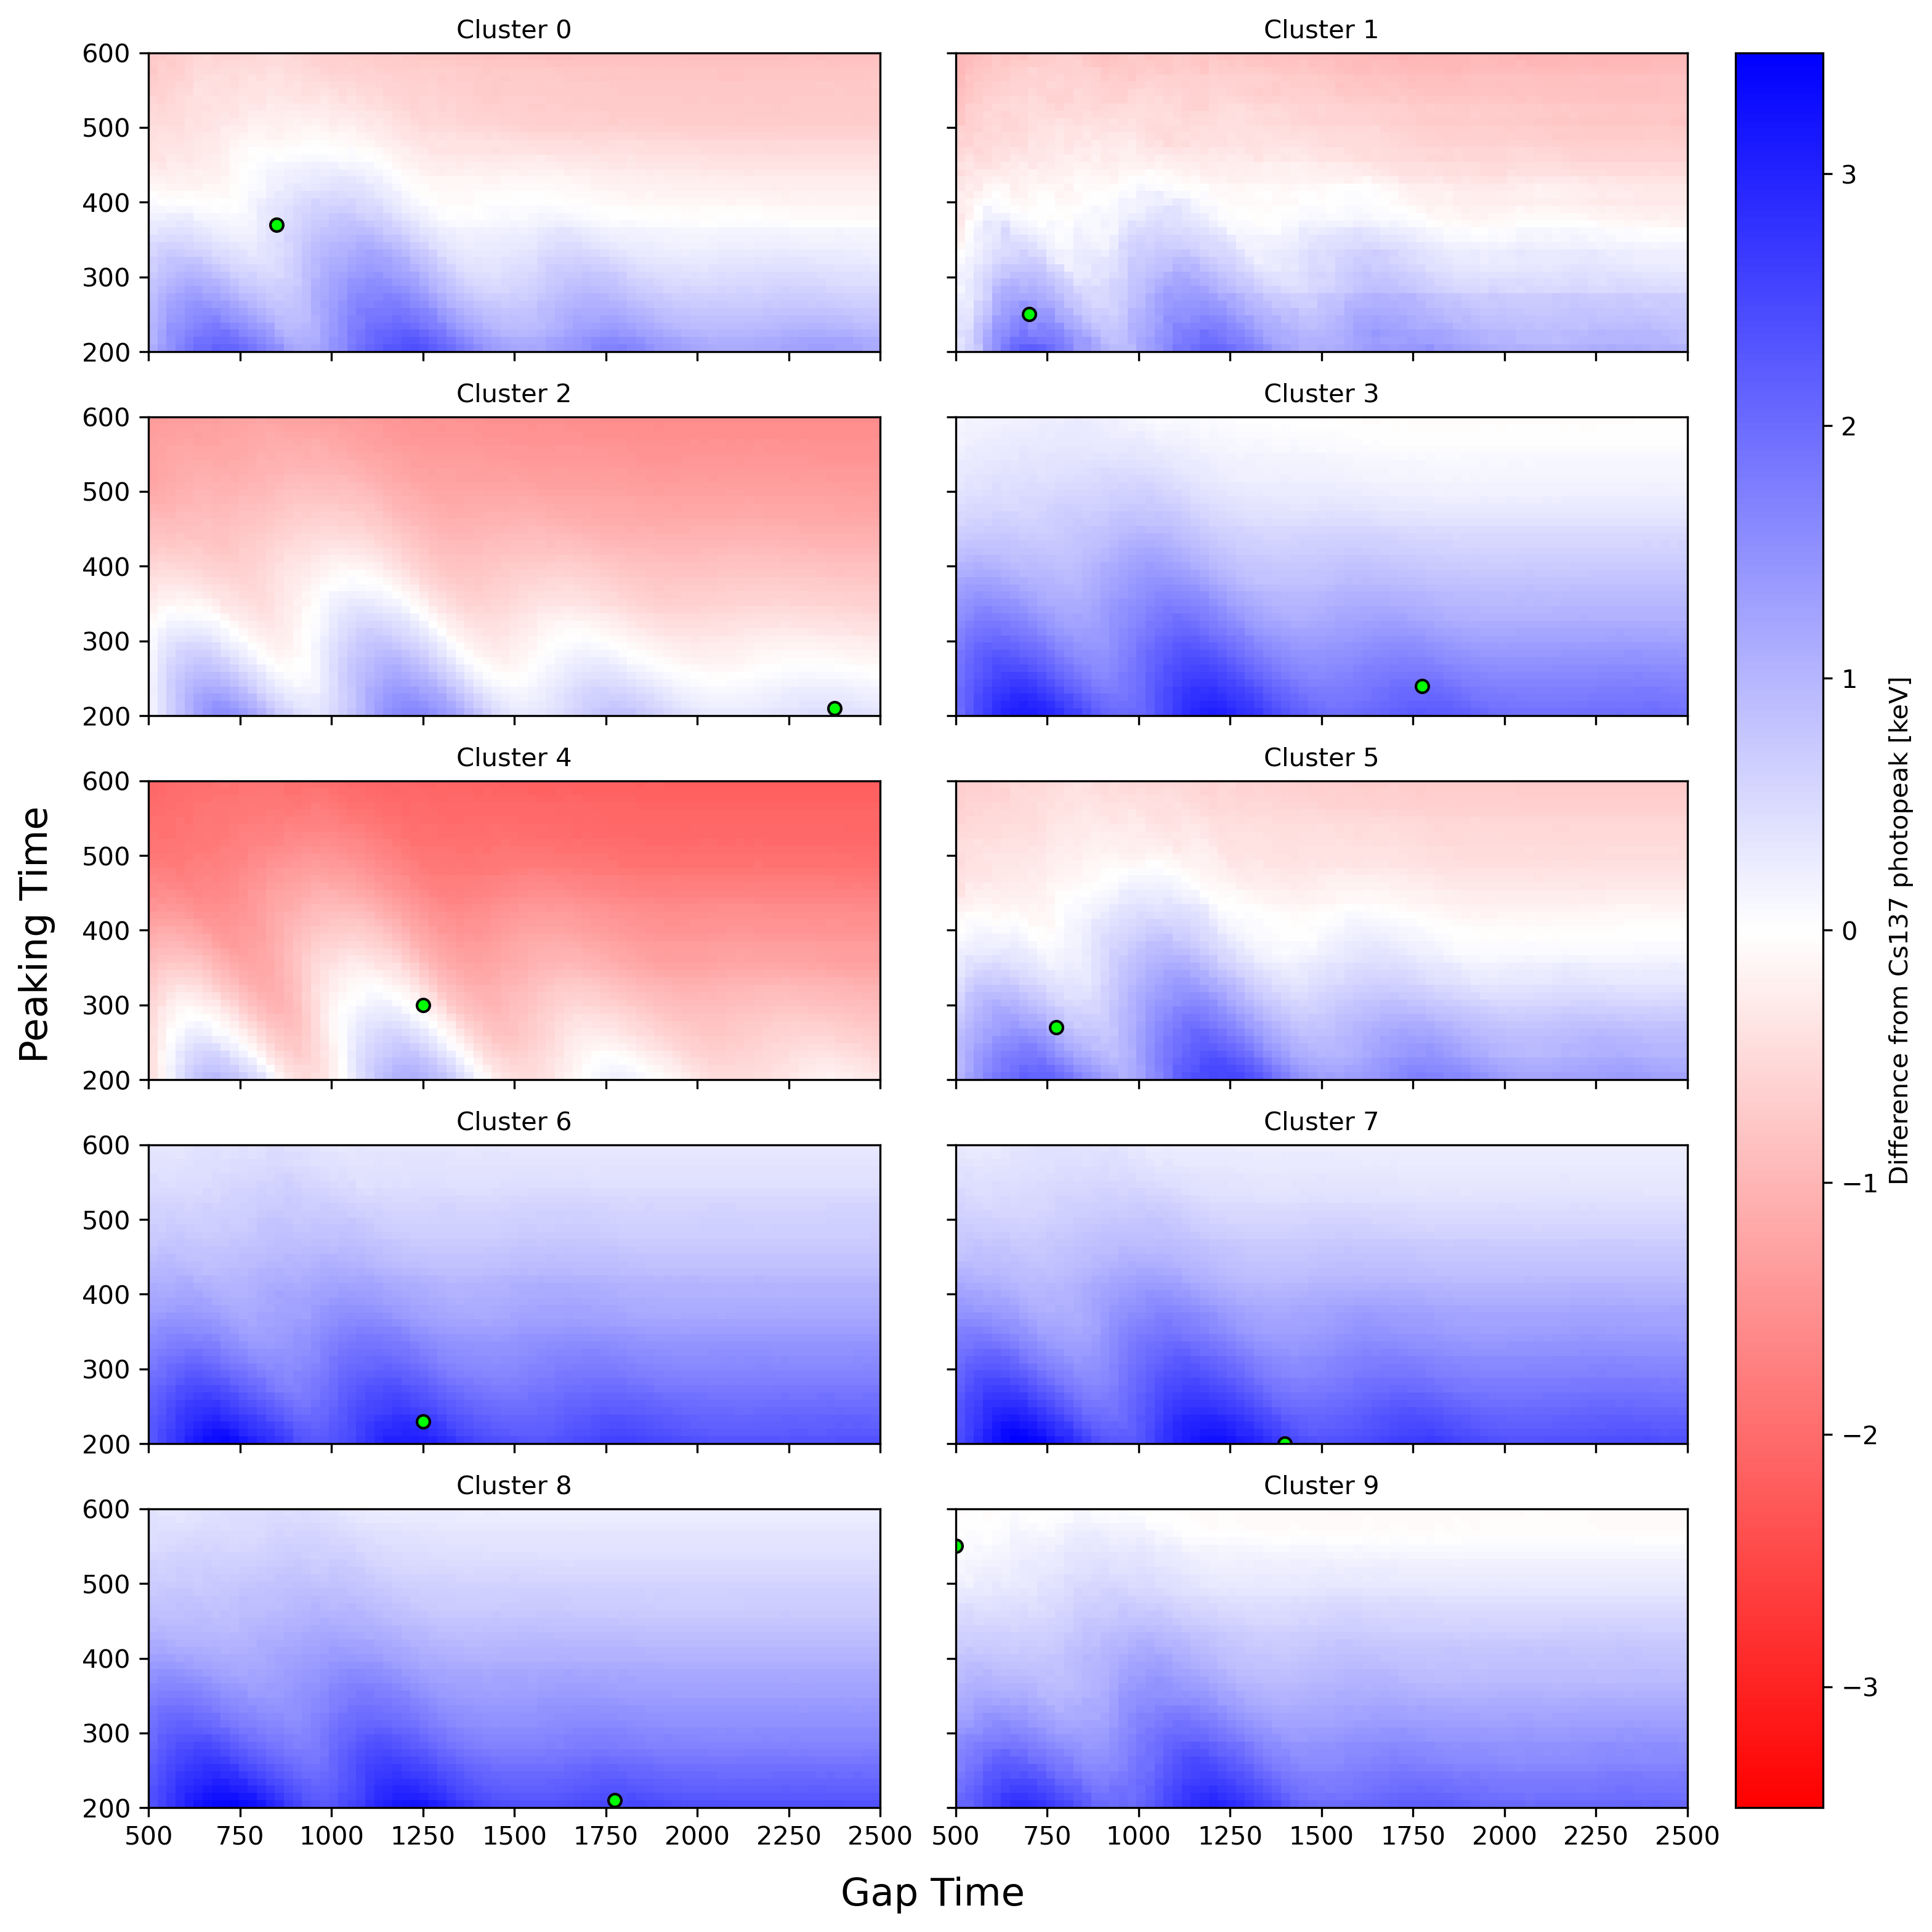

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=[10,10], constrained_layout=True)

cmap = cm.get_cmap('bwr_r')
delta_E = np.max([np.abs(661.657-np.min(means_all)), np.abs(661.657-np.max(means_all))])
normalizer = Normalize(-delta_E, delta_E)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

for cluster, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(means_all[cluster])-661.657, extent=(500, 2500, 200, 600), aspect='auto', 
              cmap=cmap, norm=normalizer)
    ax.scatter(parameters[np.argmin(stds_all[cluster])][1], parameters[np.argmin(stds_all[cluster])][0], 
                s=25, edgecolors='black', color='lime')
    ax.set_title('Cluster {}'.format(cluster), fontsize=10)
fig.colorbar(im, ax=axes.ravel().tolist(), label='Difference from Cs137 photopeak [keV]', pad=0.01)

fig.supxlabel('Gap Time', x=0.465, y=-0.03, fontsize=15)
fig.supylabel('Peaking Time', x=-0.03, fontsize=15)
plt.savefig('Plots/all_clusters_optimized_means.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [80]:
data, sat = import_data('../Lab-1/Data/Combined_Data/Cs137-24in-2.h5')
energies_old = import_lab1_energies('Cs137')

energies_new = better_calibrate_pulses(data, kmeans, optimums, ignore_clusters=[2,4])

Checking for Saturation:   0%|          | 0/16145 [00:00<?, ?it/s]

Loading in calibrated Cs137 spectra


Modifying data for kmeans identification:   0%|          | 0/16145 [00:00<?, ?it/s]

Index 2322 failed for some reason?
Index 9501 failed for some reason?


Creating better spectra:   0%|          | 0/16143 [00:00<?, ?it/s]

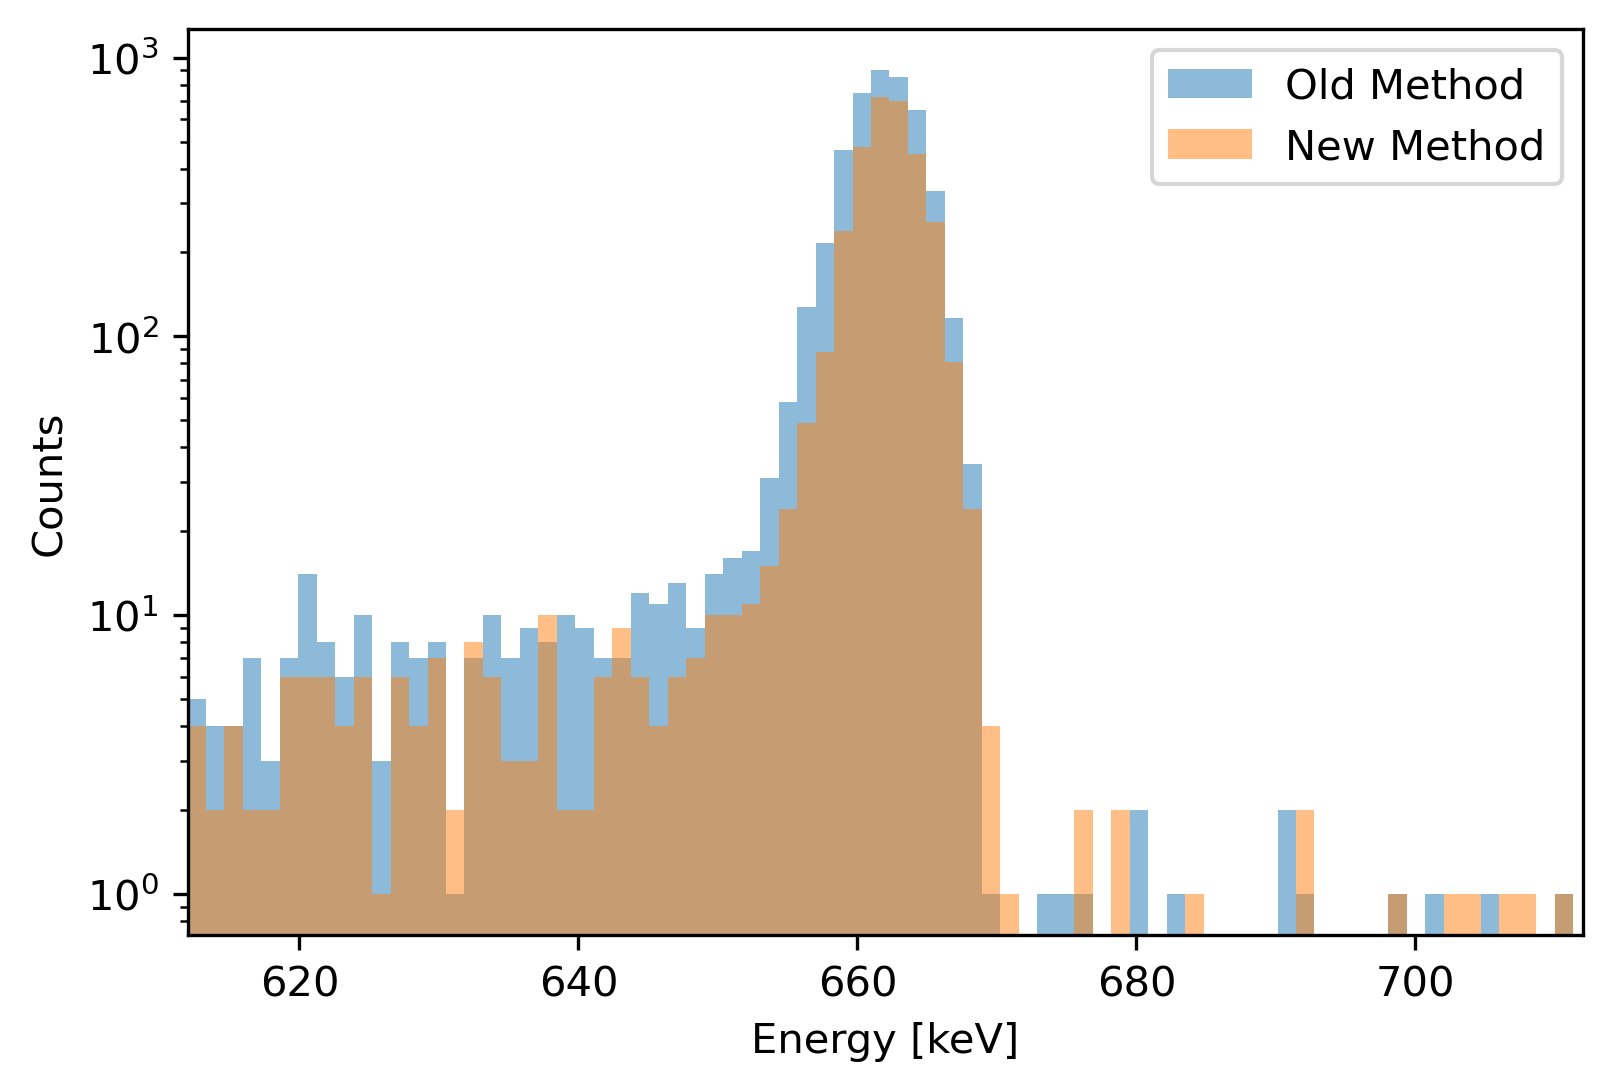

In [81]:
e_interest, delt = 662, 50

roi_low, roi_high = e_interest-delt, e_interest+delt
#roi_low, roi_high = 130, 150

plot_spectra([energies_old, energies_new], ['Old Method', 'New Method'], adc_bit=11)
plt.xlim(roi_low, roi_high)

# plt.savefig('Plots/old_new_comparison_{}-{}.png'.format(roi_low, roi_high),
#             dpi=300, facecolor='white', bbox_inches='tight')

plt.show()

In [90]:
spec_old = bq.Spectrum.from_listmode(energies_old)
spec_new = bq.Spectrum.from_listmode(energies_new)

model = (bq.fitting.GaussModel(prefix='gauss_') + bq.fitting.LineModel(prefix='linear_'))

fitter_old = bq.Fitter(
    model,
    x=spec_old.bin_indices,
    y=spec_old.counts_vals,
    y_unc=spec_old.counts_uncs,
    roi=(roi_low, roi_high)
)

fitter_old.fit()

fitter_new = bq.Fitter(
    model,
    x=spec_new.bin_indices,
    y=spec_new.counts_vals,
    y_unc=spec_new.counts_uncs,
    roi=(roi_low, roi_high)
)

fitter_new.fit()

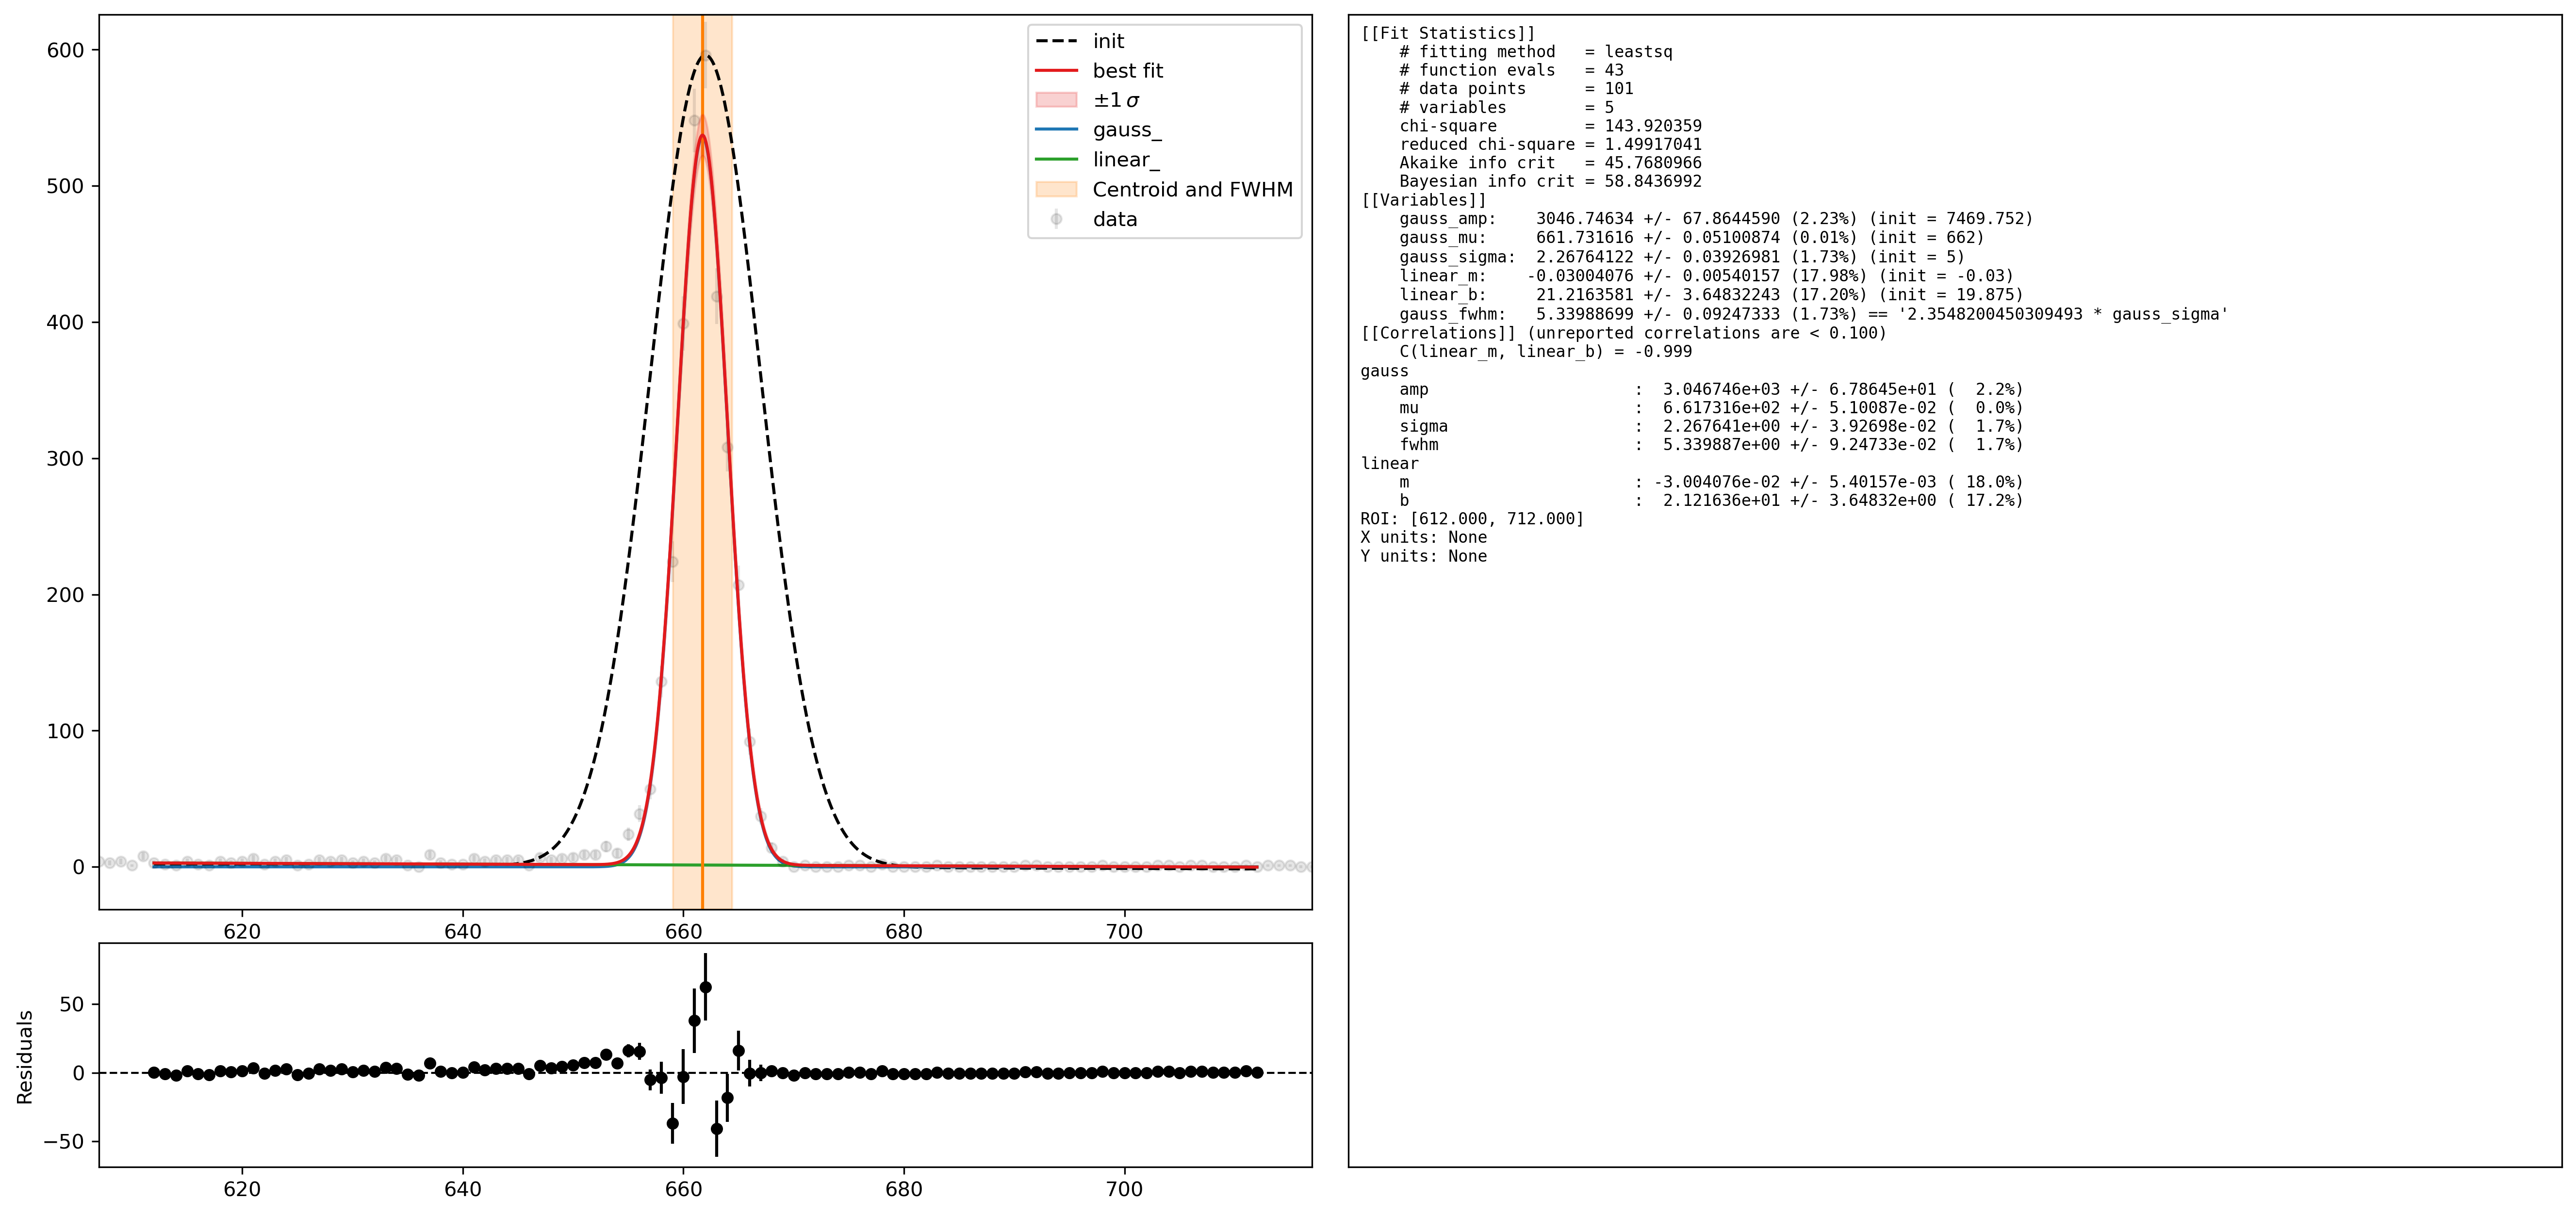

In [91]:
fitter_new.custom_plot()
plt.savefig('Plots/becquerel_test.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [83]:
fitter_old.best_values

{'linear_m': -0.043508018277564176,
 'linear_b': 30.41409812683806,
 'gauss_amp': 4398.654883233951,
 'gauss_mu': 661.2966283489654,
 'gauss_sigma': 2.468419762900868}

In [84]:
fitter_new.best_values

{'linear_m': -0.030040761870635903,
 'linear_b': 21.21635806935753,
 'gauss_amp': 3046.746335776353,
 'gauss_mu': 661.7316158068373,
 'gauss_sigma': 2.267641215101949}

In [85]:
imp = (fitter_old.best_values['gauss_sigma']-fitter_new.best_values['gauss_sigma'])/fitter_old.best_values['gauss_sigma']*100

print('Using the new method provided a {}% improvement in resolution'.format(round(imp, 3)))

Using the new method provided a 8.134% improvement in resolution


## Improvements Plotting

In [86]:
improvement_comparison = {'Energies': np.array([661.657, # Cs137
                                1173.228, 1332.492, # Co60
                                238.894, 277.260, 300.166, 583.660, 728.117, 861.526, # 2614.570, # Th228
                                121.874, 136.154, # Co57
                                121.960, 244.928, 344.414, 779.719, 868.333, # Eu152
                                965.513, 1088.182, 1113.588, 1408.541]), # Eu152
                         'Sigmas_Old': np.array([2.457, 
                                3.310, 3.411,
                                2.031, 1.639, 1.989, 2.513, 2.782, 2.946, # 6.482,
                                1.808, 1.777,
                                1.815, 1.951, 2.104, 2.940, 3.276,
                                3.289, 3.548, 3.512, 3.995]),
                         'Sigmas_New': np.array([2.259, 
                                3.144, 3.482,
                                2.137, 1.728, 2.008, 2.333, 2.482, 2.700, # 6.502,
                                1.821, 1.733,
                                1.794, 2.136, 2.104, 2.527, 2.857,
                                2.878, 3.478, 3.112, 3.681])}

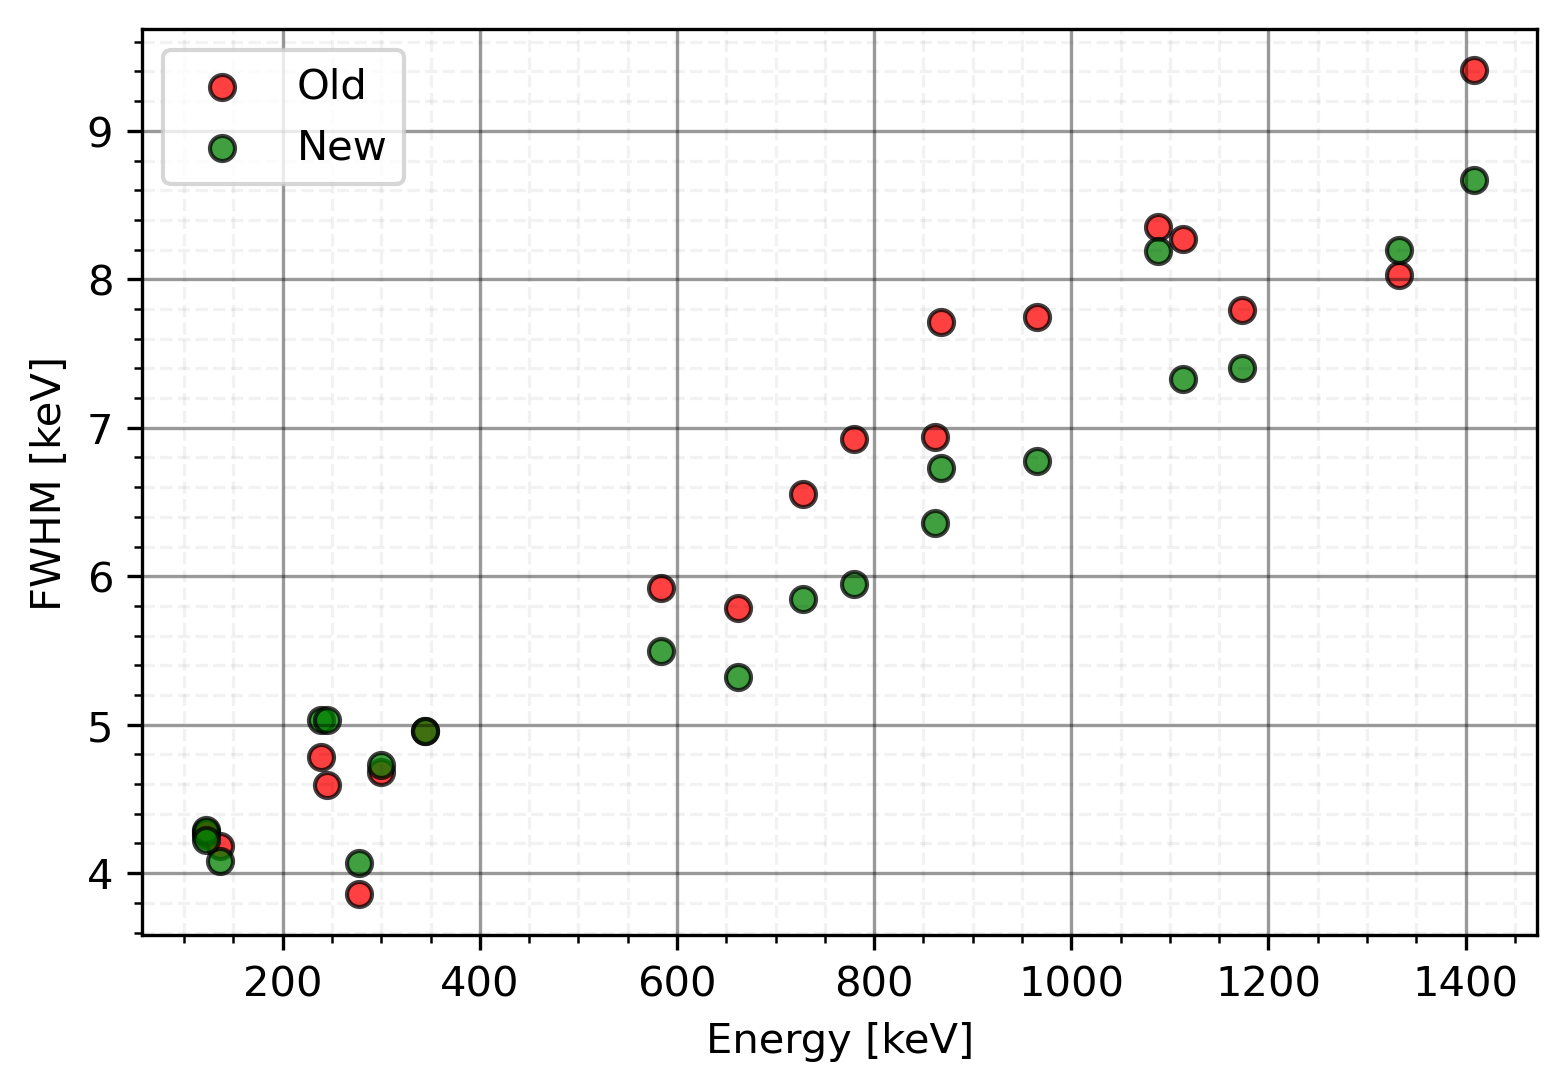

In [87]:
plt.scatter(improvement_comparison['Energies'], improvement_comparison['Sigmas_Old']*(2*np.sqrt(2*np.log(2))), 
               color='red', label='Old', edgecolor='black', alpha=0.75)
plt.scatter(improvement_comparison['Energies'], improvement_comparison['Sigmas_New']*(2*np.sqrt(2*np.log(2))), 
               color='green', label='New', edgecolor='black', alpha=0.75)
plt.grid(which='major', color='k', linestyle='-', alpha=0.4)
plt.minorticks_on()
plt.grid(which='minor', color='k', linestyle='--', alpha=0.05)
plt.legend()
plt.ylabel('FWHM [keV]')
plt.xlabel('Energy [keV]')

plt.savefig('Plots/FWHM_change_new_method.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

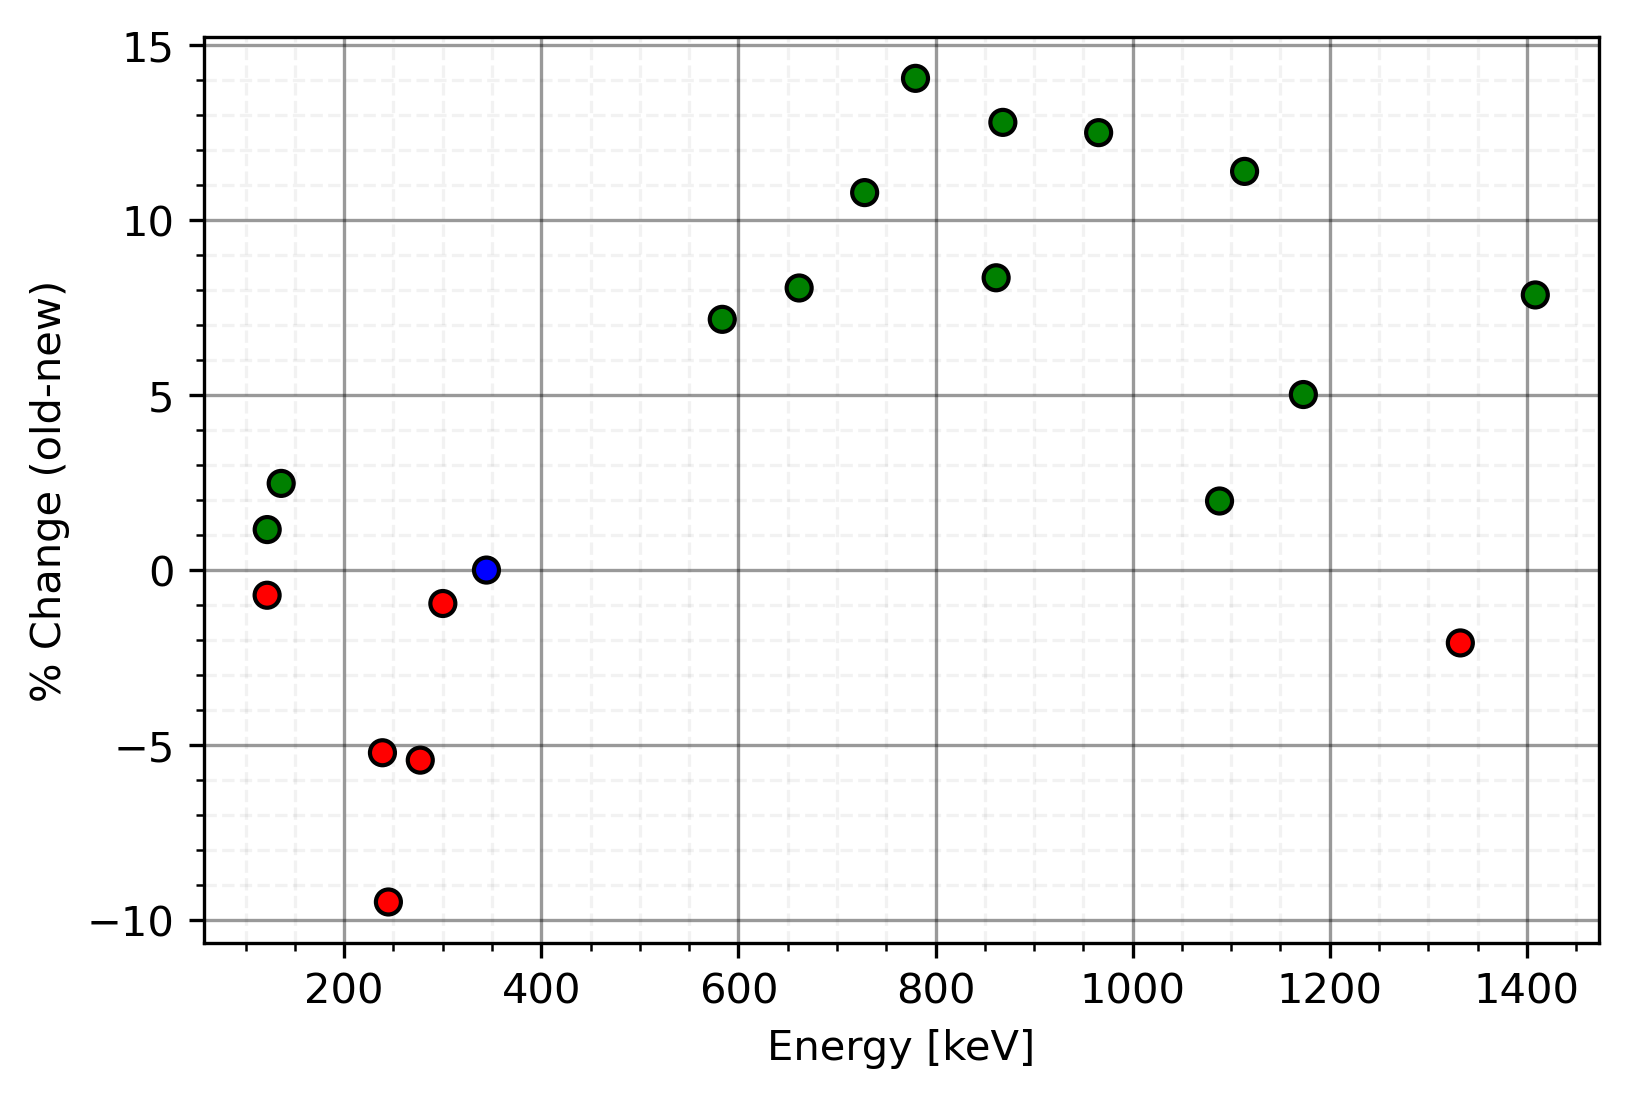

In [88]:
diff = (improvement_comparison['Sigmas_Old']-improvement_comparison['Sigmas_New'])/improvement_comparison['Sigmas_Old']*100

colors = list(np.where(diff>0, 'green', 'red'))

for i in np.argwhere(diff == 0)[:,0]:
    colors[i] = 'blue'

plt.scatter(improvement_comparison['Energies'], diff, color=colors, edgecolor='black', zorder=5)
plt.grid(which='major', color='k', linestyle='-', alpha=0.4)
plt.minorticks_on()
plt.grid(which='minor', color='k', linestyle='--', alpha=0.05)
plt.xlabel('Energy [keV]')
plt.ylabel('% Change (old-new)')

plt.savefig('Plots/percent_change_new_method.png', dpi=300, facecolor='white', bbox_inches='tight')

plt.show()